### Project: Bankruptcy Prevention


    Business Objective:

    This is a classification project, since the variable to predict is binary (bankruptcy or non-bankruptcy). 
    The goal here is to model the probability that a business goes bankrupt from different features.

    The data file contains 7 features about 250 companies
    The data set includes the following variables:
     
    1.industrial_risk: 0=low risk, 0.5=medium risk, 1=high risk.
    2.management_risk: 0=low risk, 0.5=medium risk, 1=high risk.
    3.financial flexibility: 0=low flexibility, 0.5=medium flexibility, 1=high flexibility.
    4.credibility: 0=low credibility, 0.5=medium credibility, 1=high credibility.
    5.competitiveness: 0=low competitiveness, 0.5=medium competitiveness, 1=high competitiveness.
    6.Operating_risk: 0=low risk, 0.5=medium risk, 1=high risk.
    7.class: bankruptcy, non-bankruptcy (target variable).


In [1]:
## Importing  Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pe
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize']=(10,8)
plt.rcParams['figure.dpi'] = 200
from sklearn.preprocessing import LabelEncoder

## Importing Dataset 

In [3]:
df = pd.read_csv("bankruptcy-prevention.csv",sep=";")
df.head(10)

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
5,1.0,1.0,0.0,0.5,0.0,0.5,bankruptcy
6,1.0,1.0,0.0,0.0,0.0,0.0,bankruptcy
7,1.0,1.0,0.0,0.0,0.0,0.5,bankruptcy
8,1.0,1.0,0.0,0.5,0.0,0.0,bankruptcy
9,1.0,1.0,0.0,0.5,0.0,1.0,bankruptcy


In [4]:
df.tail()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy
249,1.0,0.0,0.5,0.5,1.0,1.0,non-bankruptcy


In [5]:
df.columns

Index(['industrial_risk', ' management_risk', ' financial_flexibility',
       ' credibility', ' competitiveness', ' operating_risk', ' class'],
      dtype='object')

## EDA

In [6]:
df.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [8]:
df.dtypes

industrial_risk           float64
 management_risk          float64
 financial_flexibility    float64
 credibility              float64
 competitiveness          float64
 operating_risk           float64
 class                     object
dtype: object

In [9]:
df.shape

(250, 7)

In [10]:
df.nunique()

industrial_risk           3
 management_risk          3
 financial_flexibility    3
 credibility              3
 competitiveness          3
 operating_risk           3
 class                    2
dtype: int64

###  Checking NULL values

In [11]:
df.isnull().sum()

industrial_risk           0
 management_risk          0
 financial_flexibility    0
 credibility              0
 competitiveness          0
 operating_risk           0
 class                    0
dtype: int64

#### There are no NULL Values in the Dataset

### Using Label Encoder to convert categorical value into binary

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[' class'] = le.fit_transform(df[' class'])
df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,1
246,1.0,1.0,0.5,1.0,1.0,0.0,1
247,0.0,1.0,1.0,0.5,0.5,0.0,1
248,1.0,0.0,0.5,1.0,0.5,0.0,1


In [13]:
# Here 0 : Bankruptcy and 1: Non-bankruptcy
df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,1
246,1.0,1.0,0.5,1.0,1.0,0.0,1
247,0.0,1.0,1.0,0.5,0.5,0.0,1
248,1.0,0.0,0.5,1.0,0.5,0.0,1


In [14]:
df.dtypes

industrial_risk           float64
 management_risk          float64
 financial_flexibility    float64
 credibility              float64
 competitiveness          float64
 operating_risk           float64
 class                      int32
dtype: object

In [15]:
df[' class'].value_counts()

1    143
0    107
Name:  class, dtype: int64

In [16]:
df.corr()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
industrial_risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507,-0.227823
management_risk,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874,-0.370838
financial_flexibility,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903,0.751020
credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458,0.755909
competitiveness,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383,0.899452
operating_risk,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000,-0.279786
class,-0.227823,-0.370838,0.751020,0.755909,0.899452,-0.279786,1.000000


<Axes: >

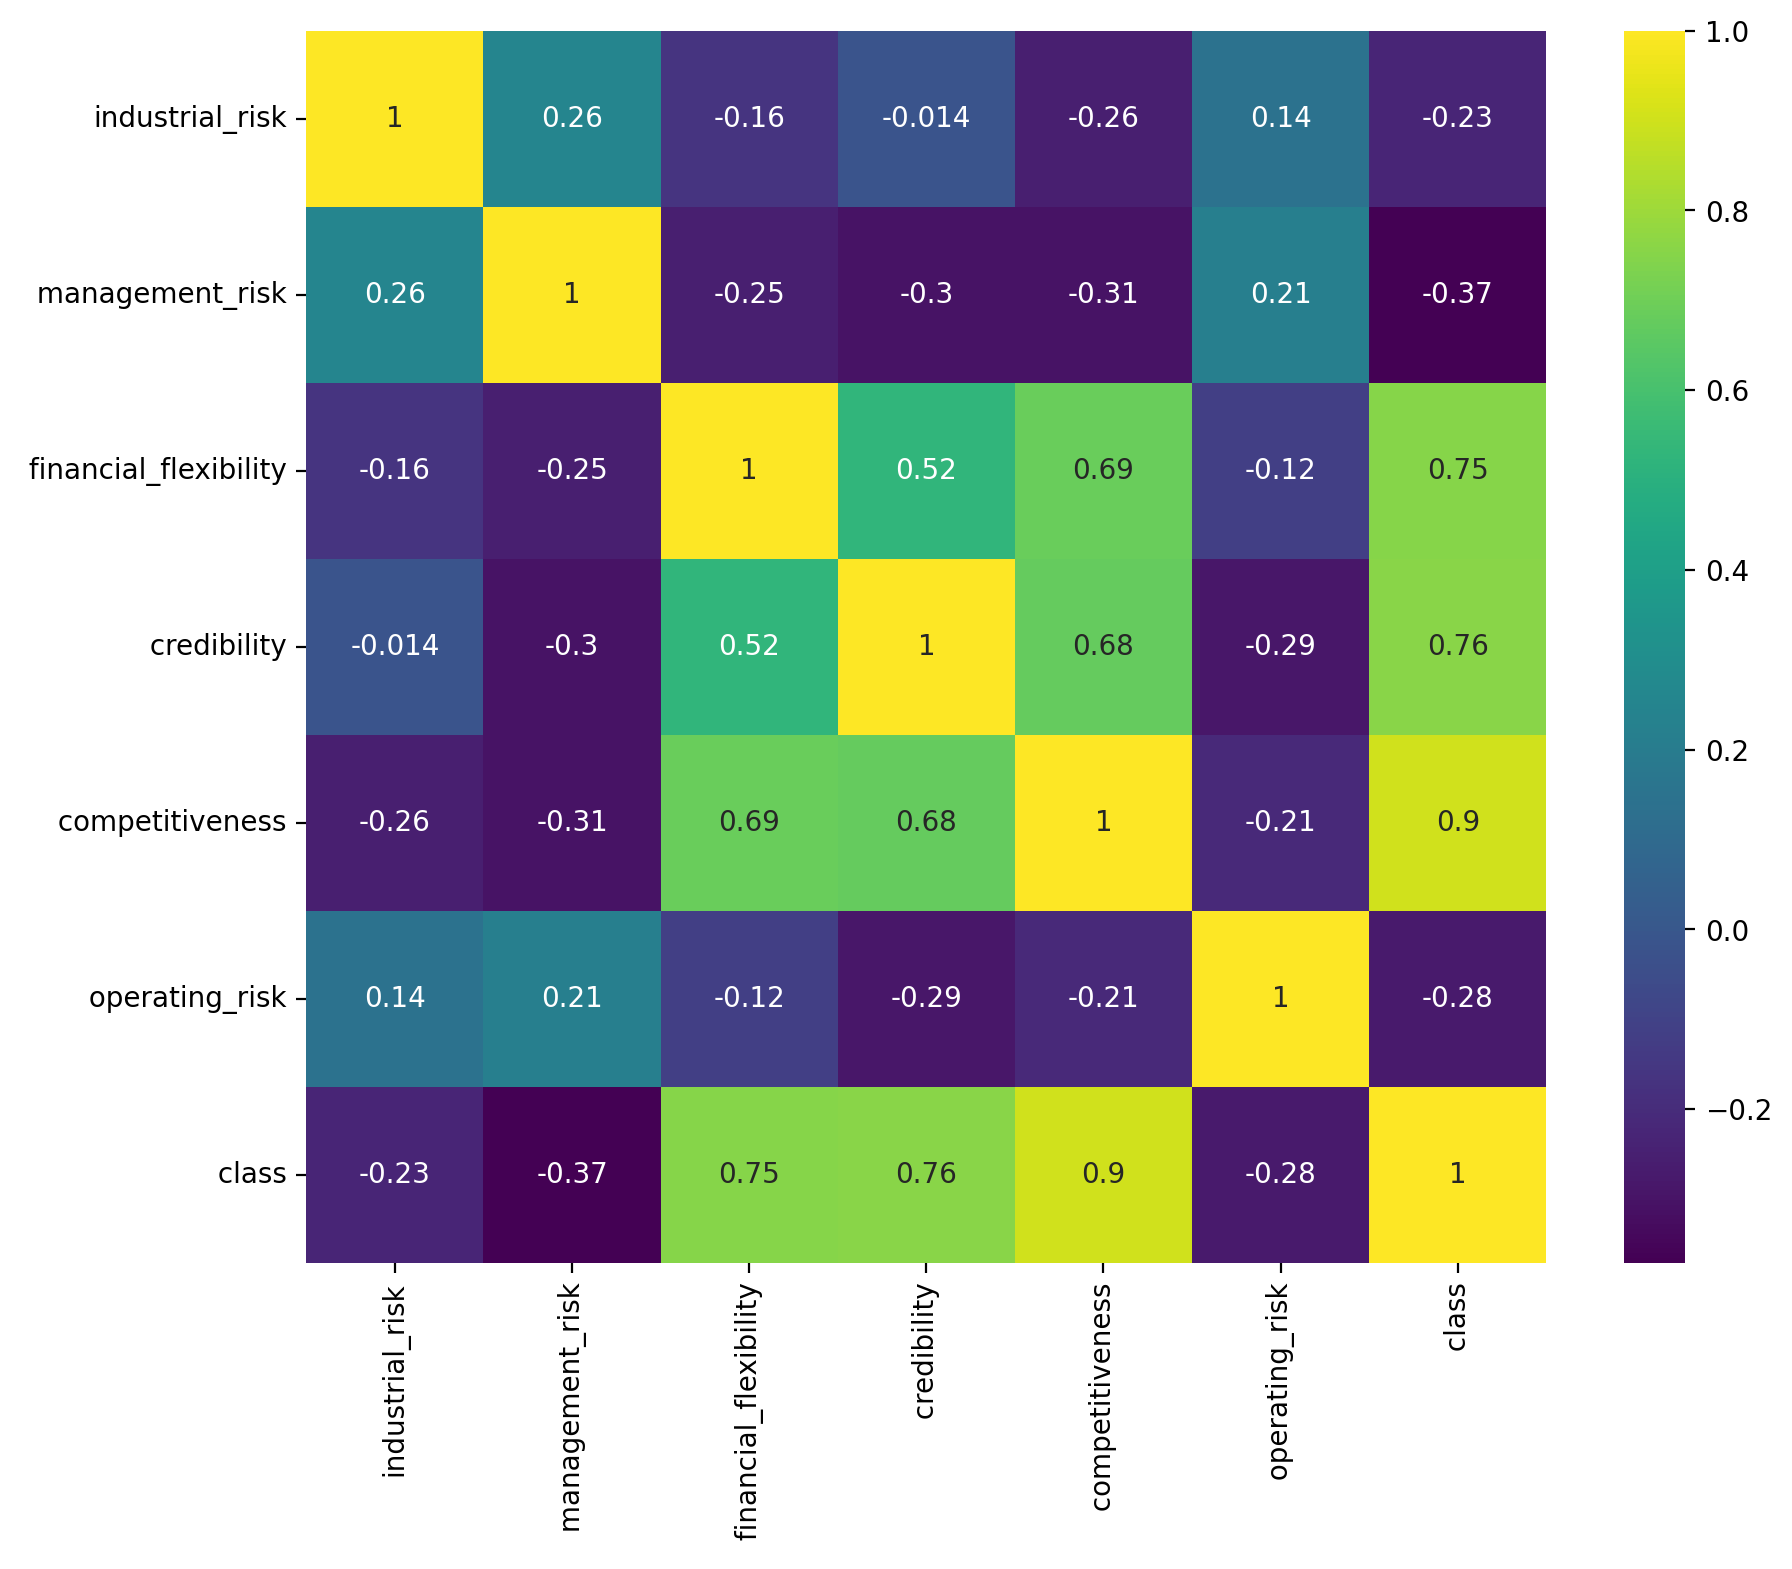

In [17]:
sns.heatmap(df.corr(),annot=True,cmap='viridis')

###  From above , we get that the features financiaLflexibility,credibility and competitiveness are highly corelated with the target variable i.e class.

## Data Visualization

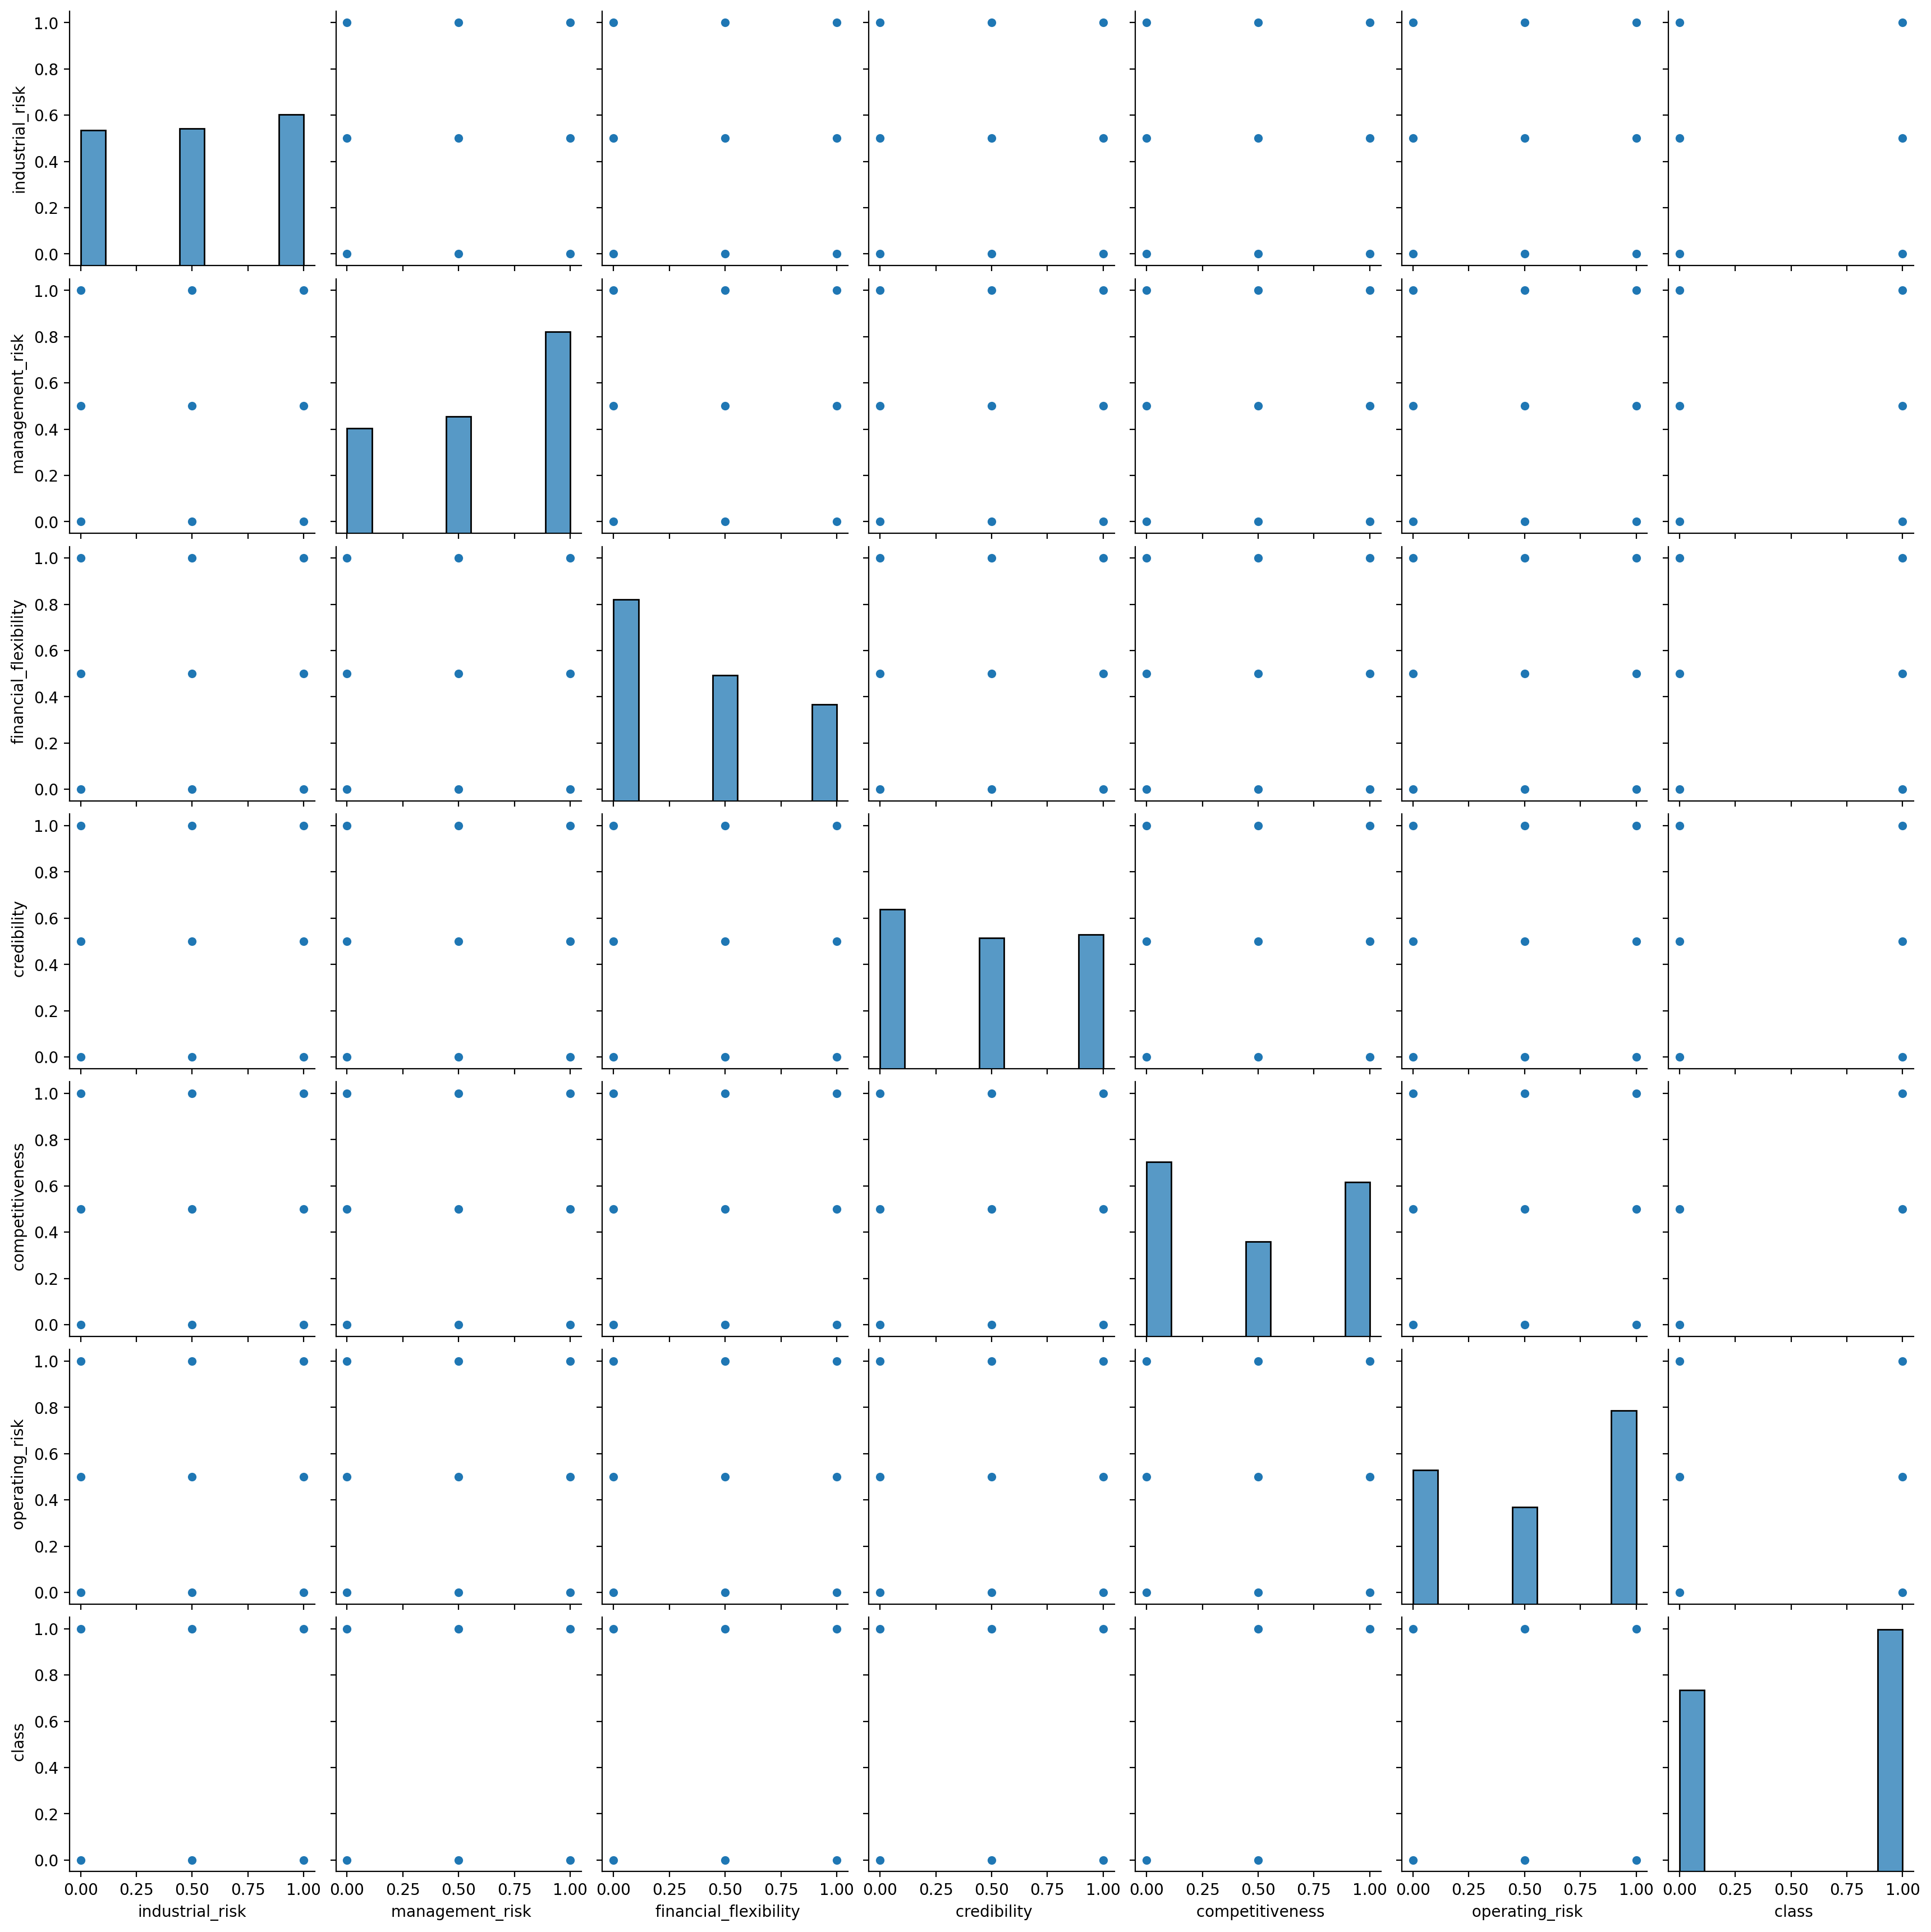

In [18]:
sns.pairplot(df)

<Axes: xlabel=' class', ylabel='count'>

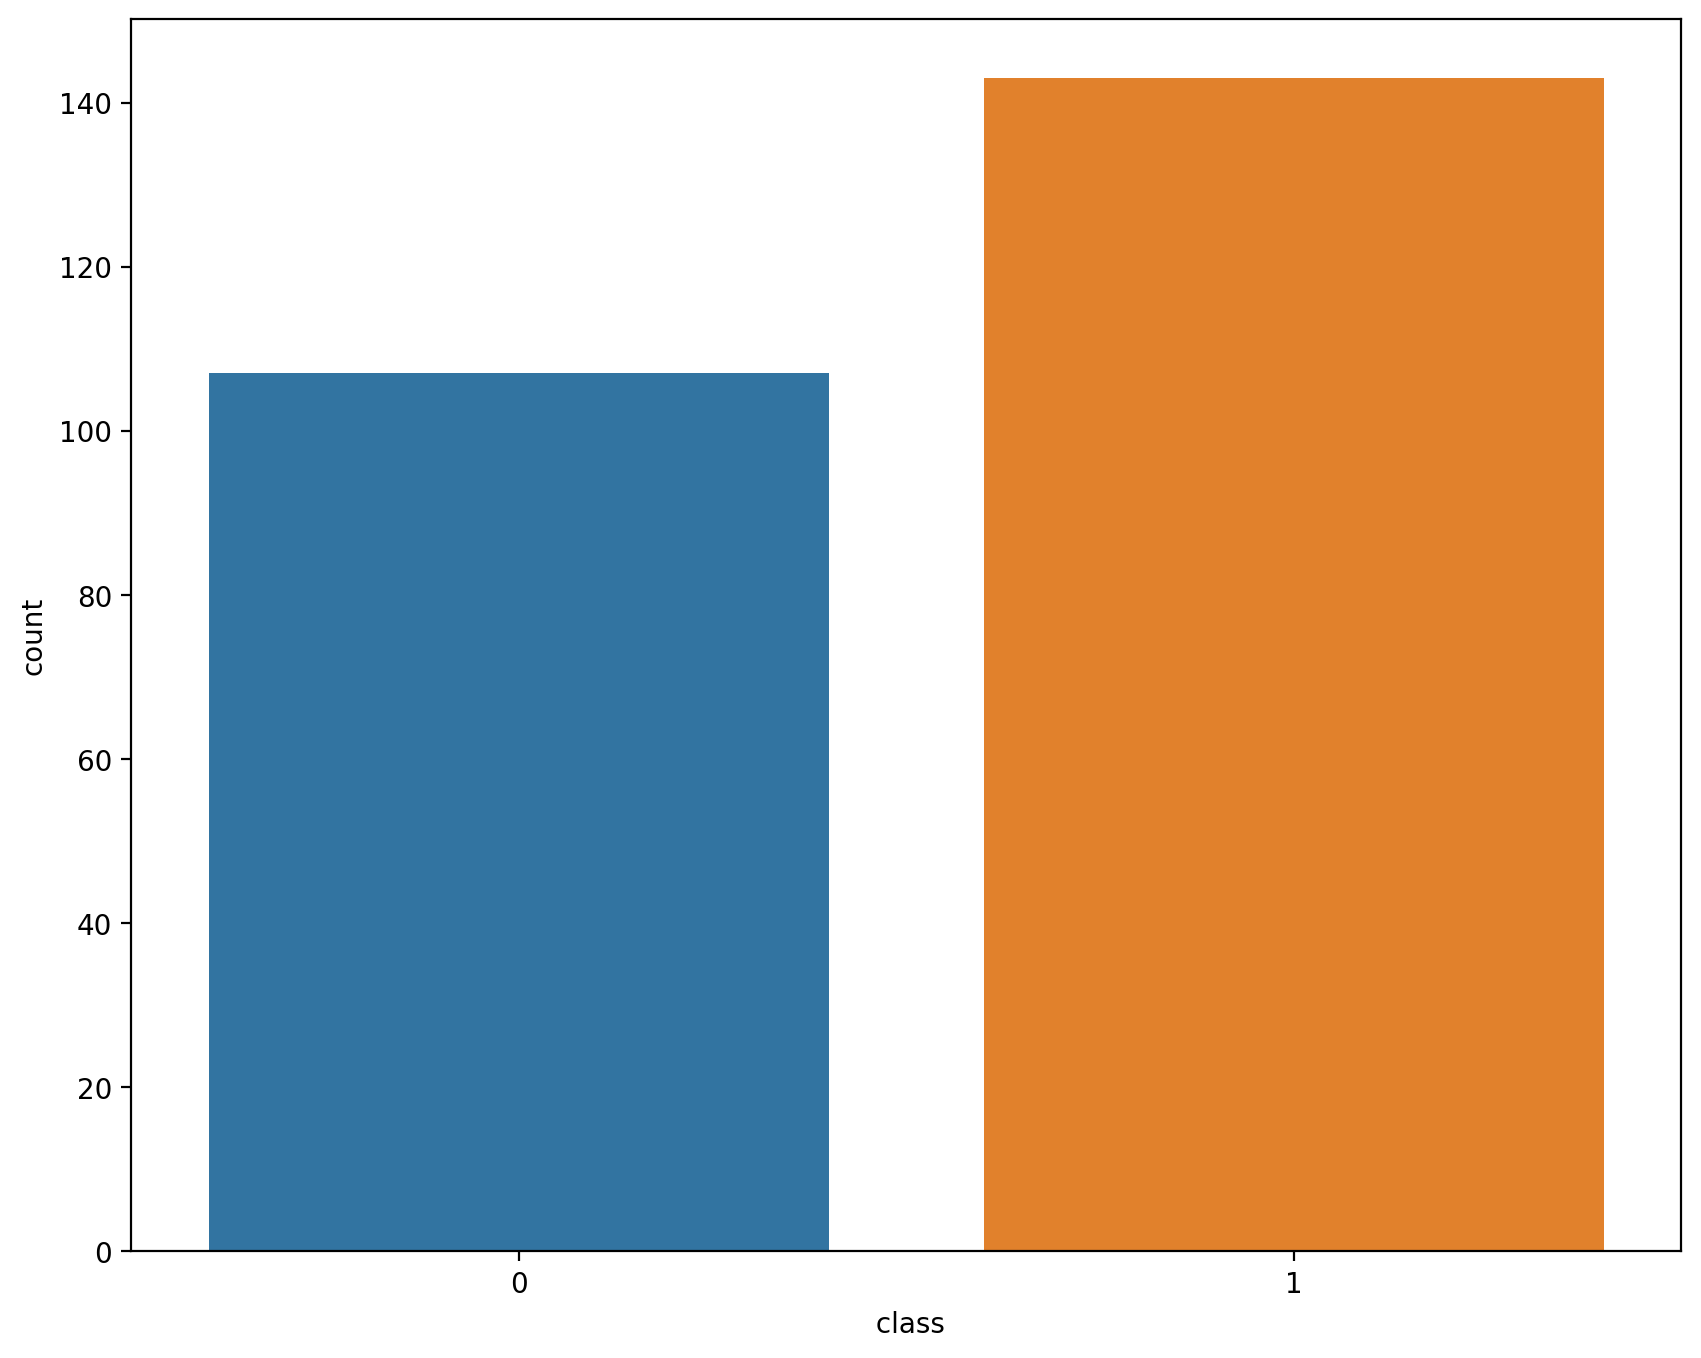

In [19]:
# Plotting the Countplot to Check how many companies are Bankrupt and non-bankrupt
sns.countplot(x=df[' class'],data=df)

<Axes: xlabel=' operating_risk', ylabel='count'>

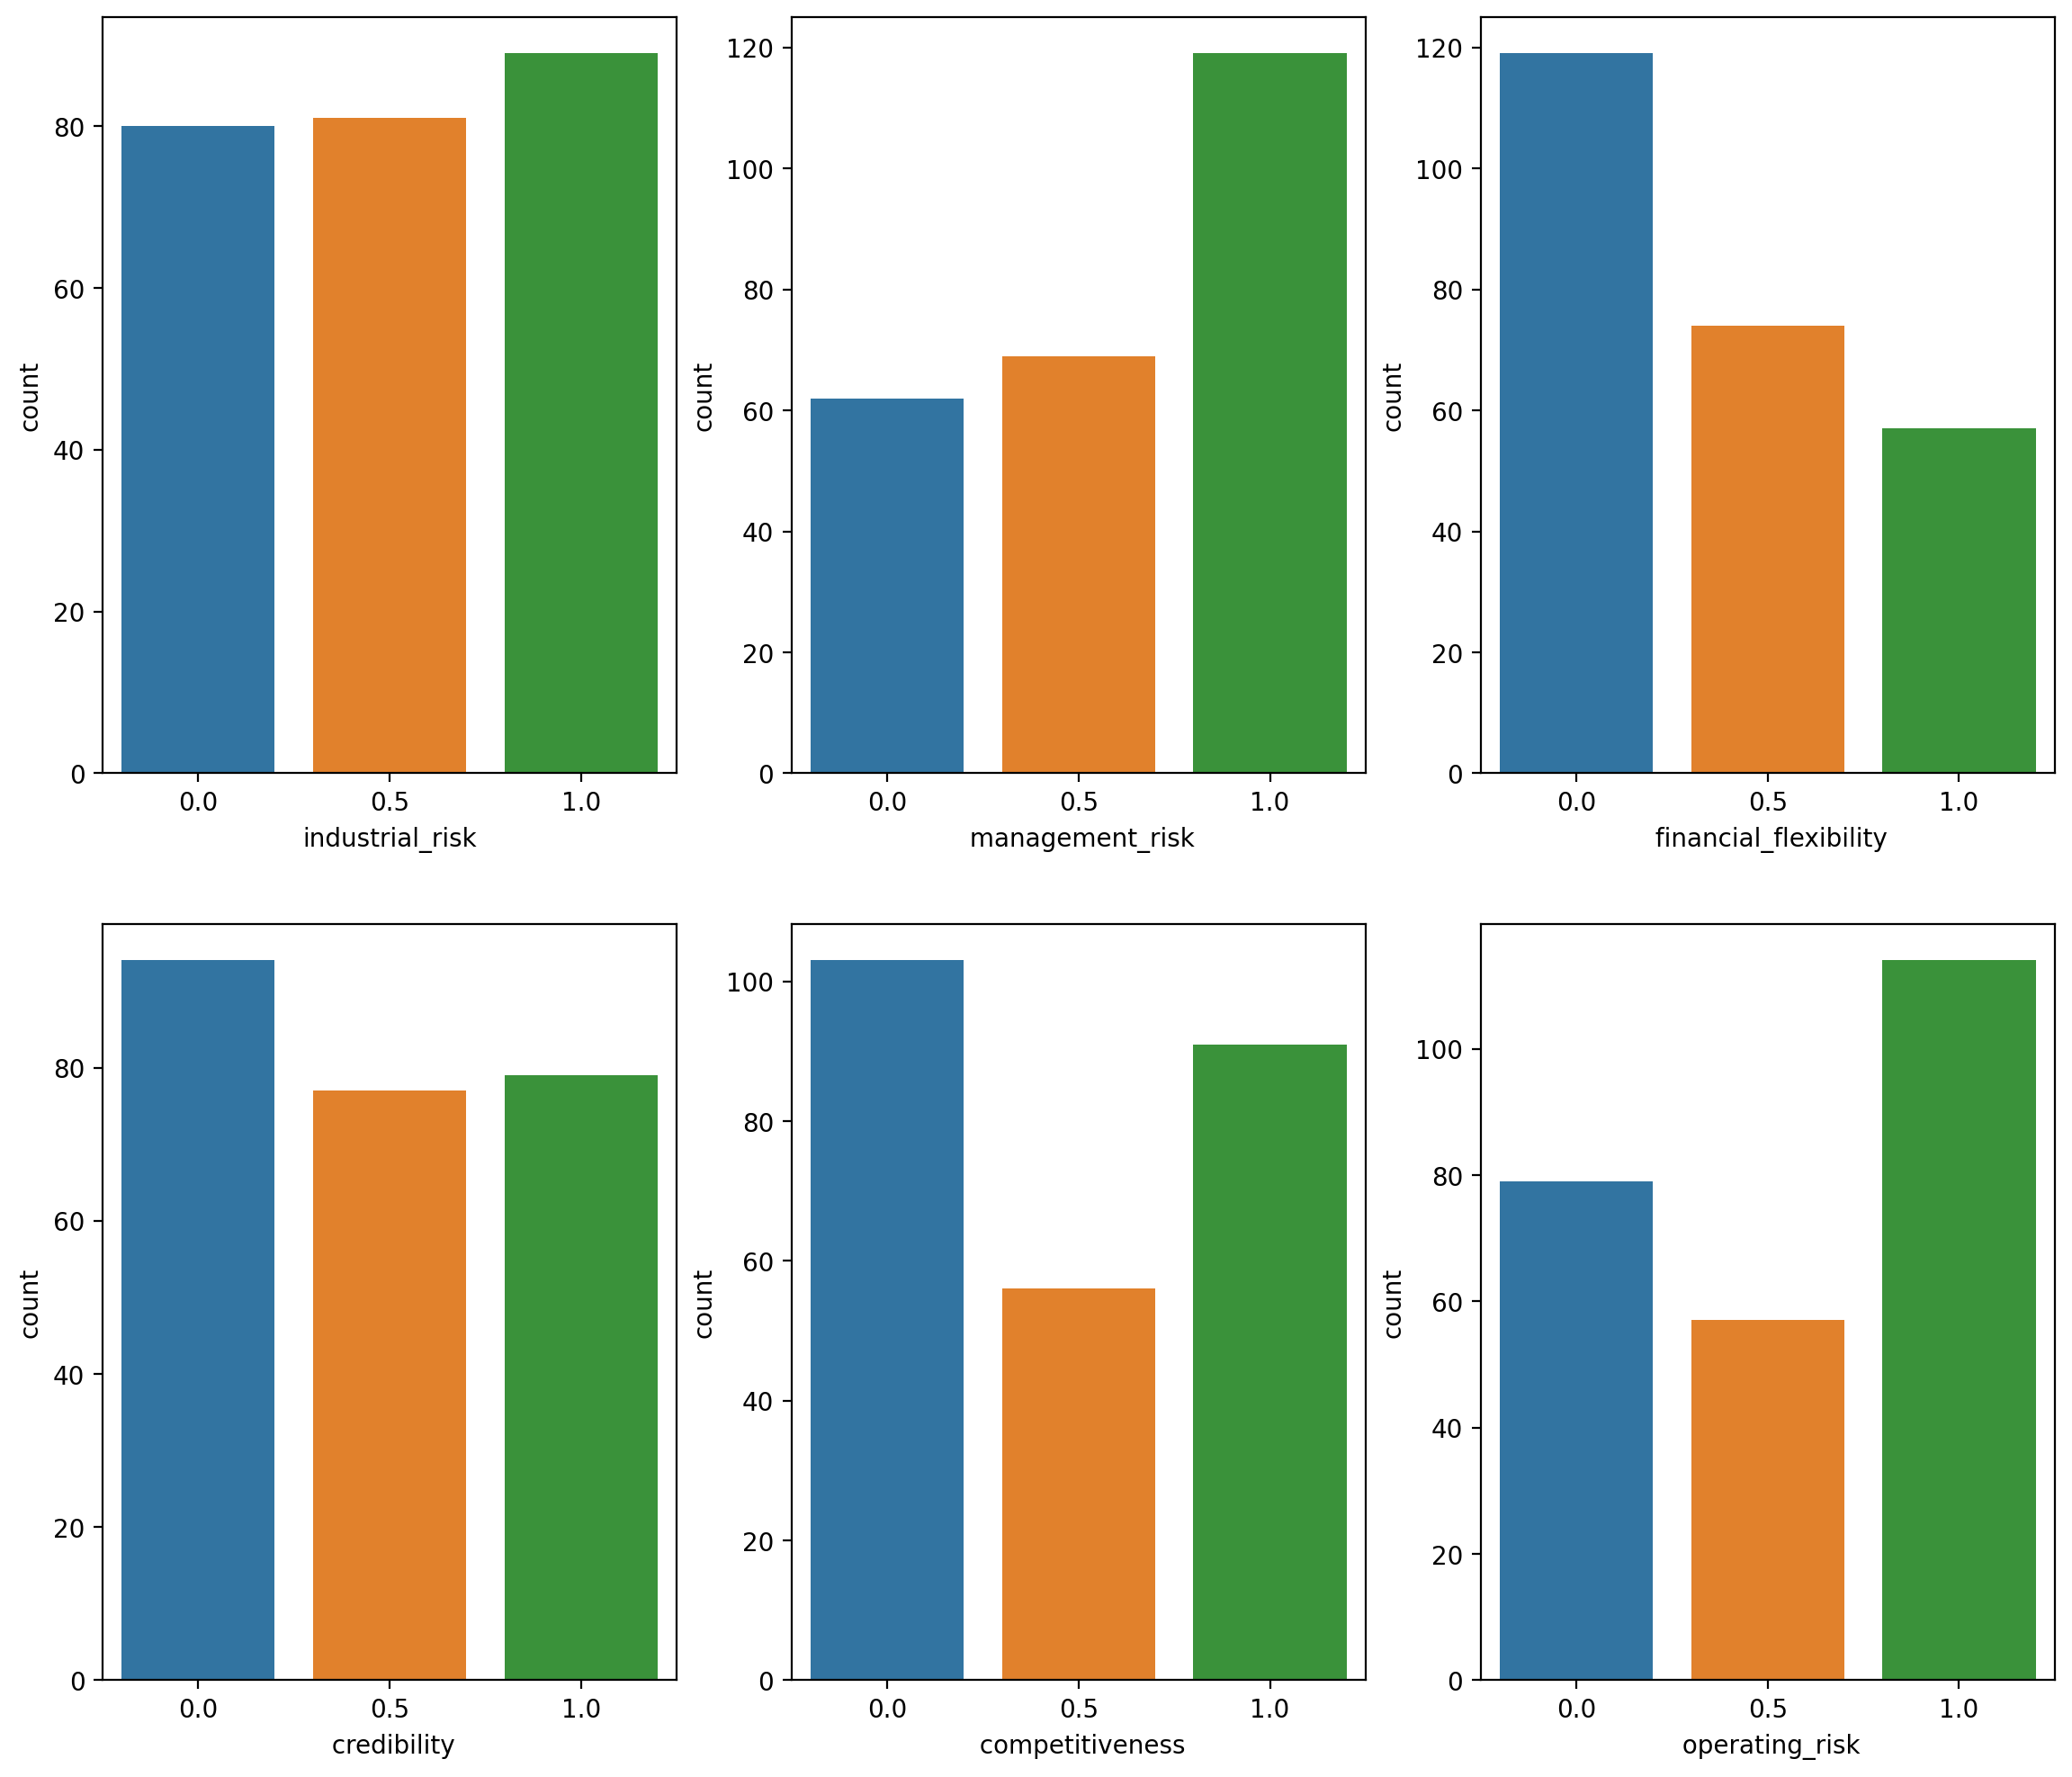

In [20]:
# Checking the count of companies w.r.t all the independent variables
fig,axes=plt.subplots(2,3,figsize=(14,12))
sns.countplot(x='industrial_risk',data=df,palette='tab10',ax=axes[0][0])
sns.countplot(x=' management_risk',data=df,palette='tab10',ax=axes[0][1])
sns.countplot(x=' financial_flexibility',data=df,palette='tab10',ax=axes[0][2])
sns.countplot(x=' credibility',data=df,palette='tab10',ax=axes[1][0])
sns.countplot(x=' competitiveness',data=df,palette='tab10',ax=axes[1][1])
sns.countplot(x=' operating_risk',data=df,palette='tab10',ax=axes[1][2])

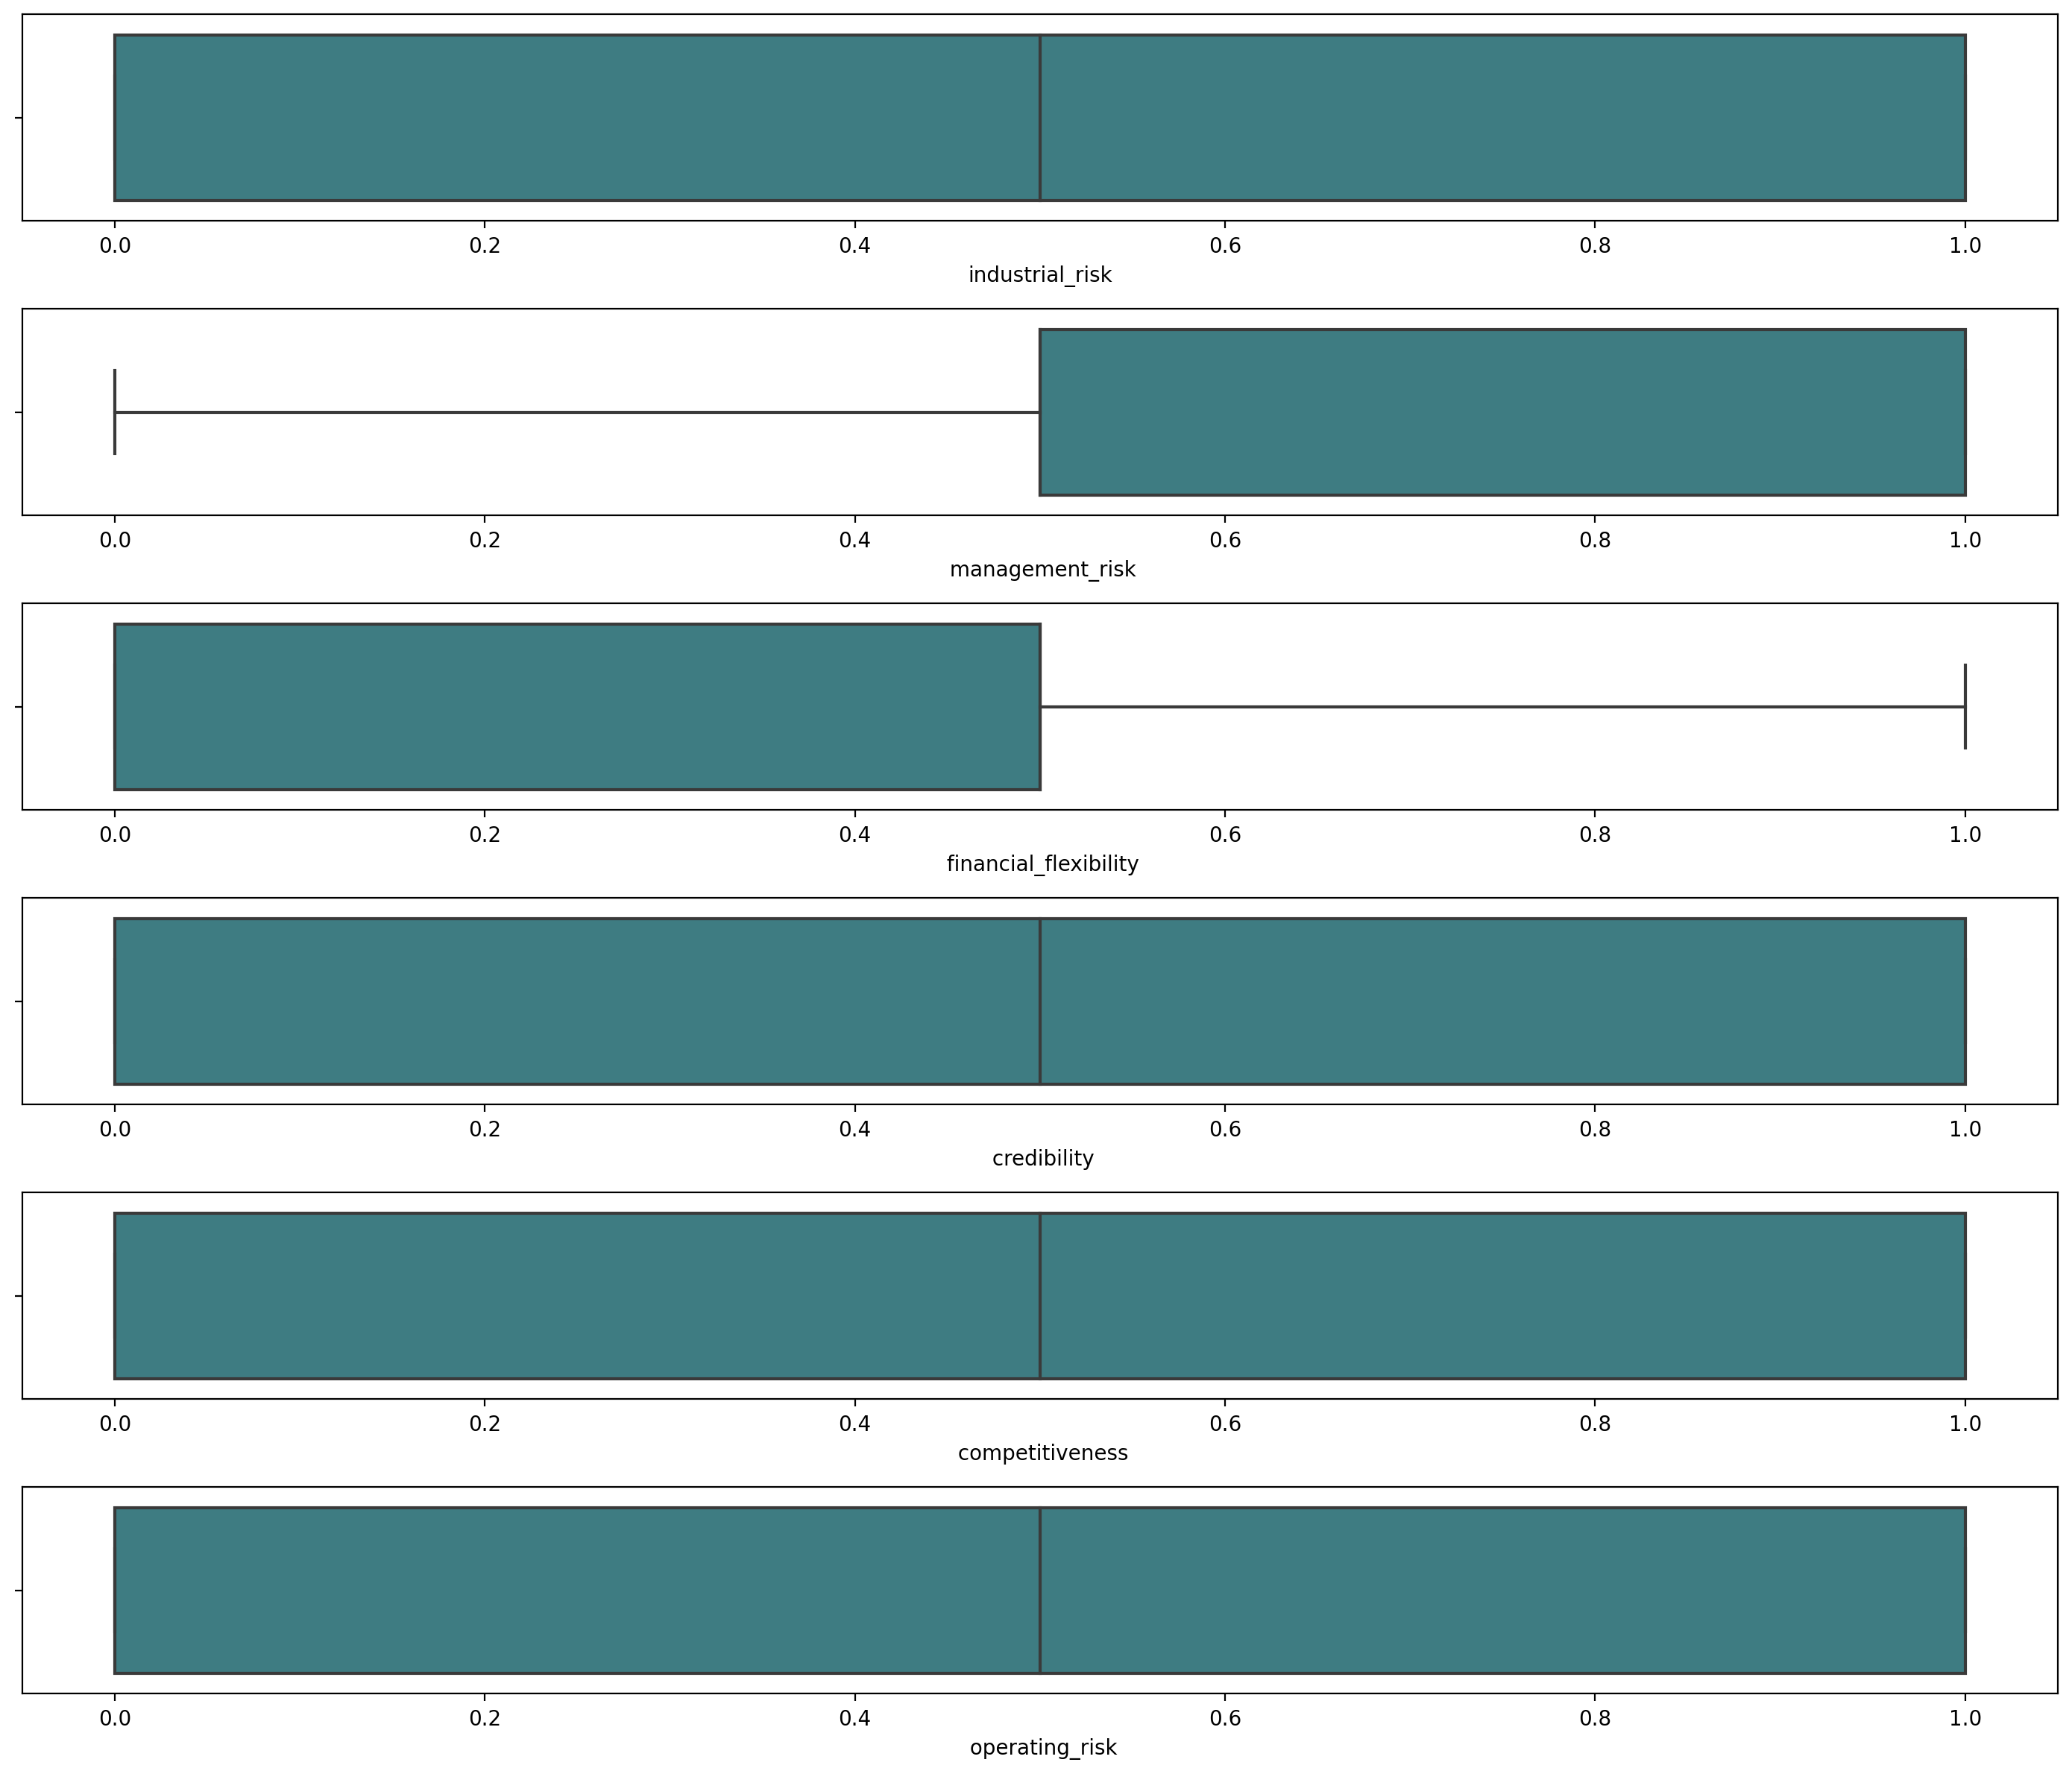

In [21]:
 # Outlier Detection
fig, axes=plt.subplots(6,1,figsize=(14,12))
sns.boxplot(x='industrial_risk',data=df,palette='crest',ax=axes[0])
sns.boxplot(x=' management_risk',data=df,palette='crest',ax=axes[1])
sns.boxplot(x=' financial_flexibility',data=df,palette='crest',ax=axes[2])
sns.boxplot(x=' credibility',data=df,palette='crest',ax=axes[3])
sns.boxplot(x=' competitiveness',data=df,palette='crest',ax=axes[4])
sns.boxplot(x=' operating_risk',data=df,palette='crest',ax=axes[5])
plt.tight_layout()

####  There are no Outliers in the Dataset

 class            0   1
industrial_risk        
0.0              26  54
0.5              28  53
1.0              53  36


<Axes: xlabel='industrial_risk'>

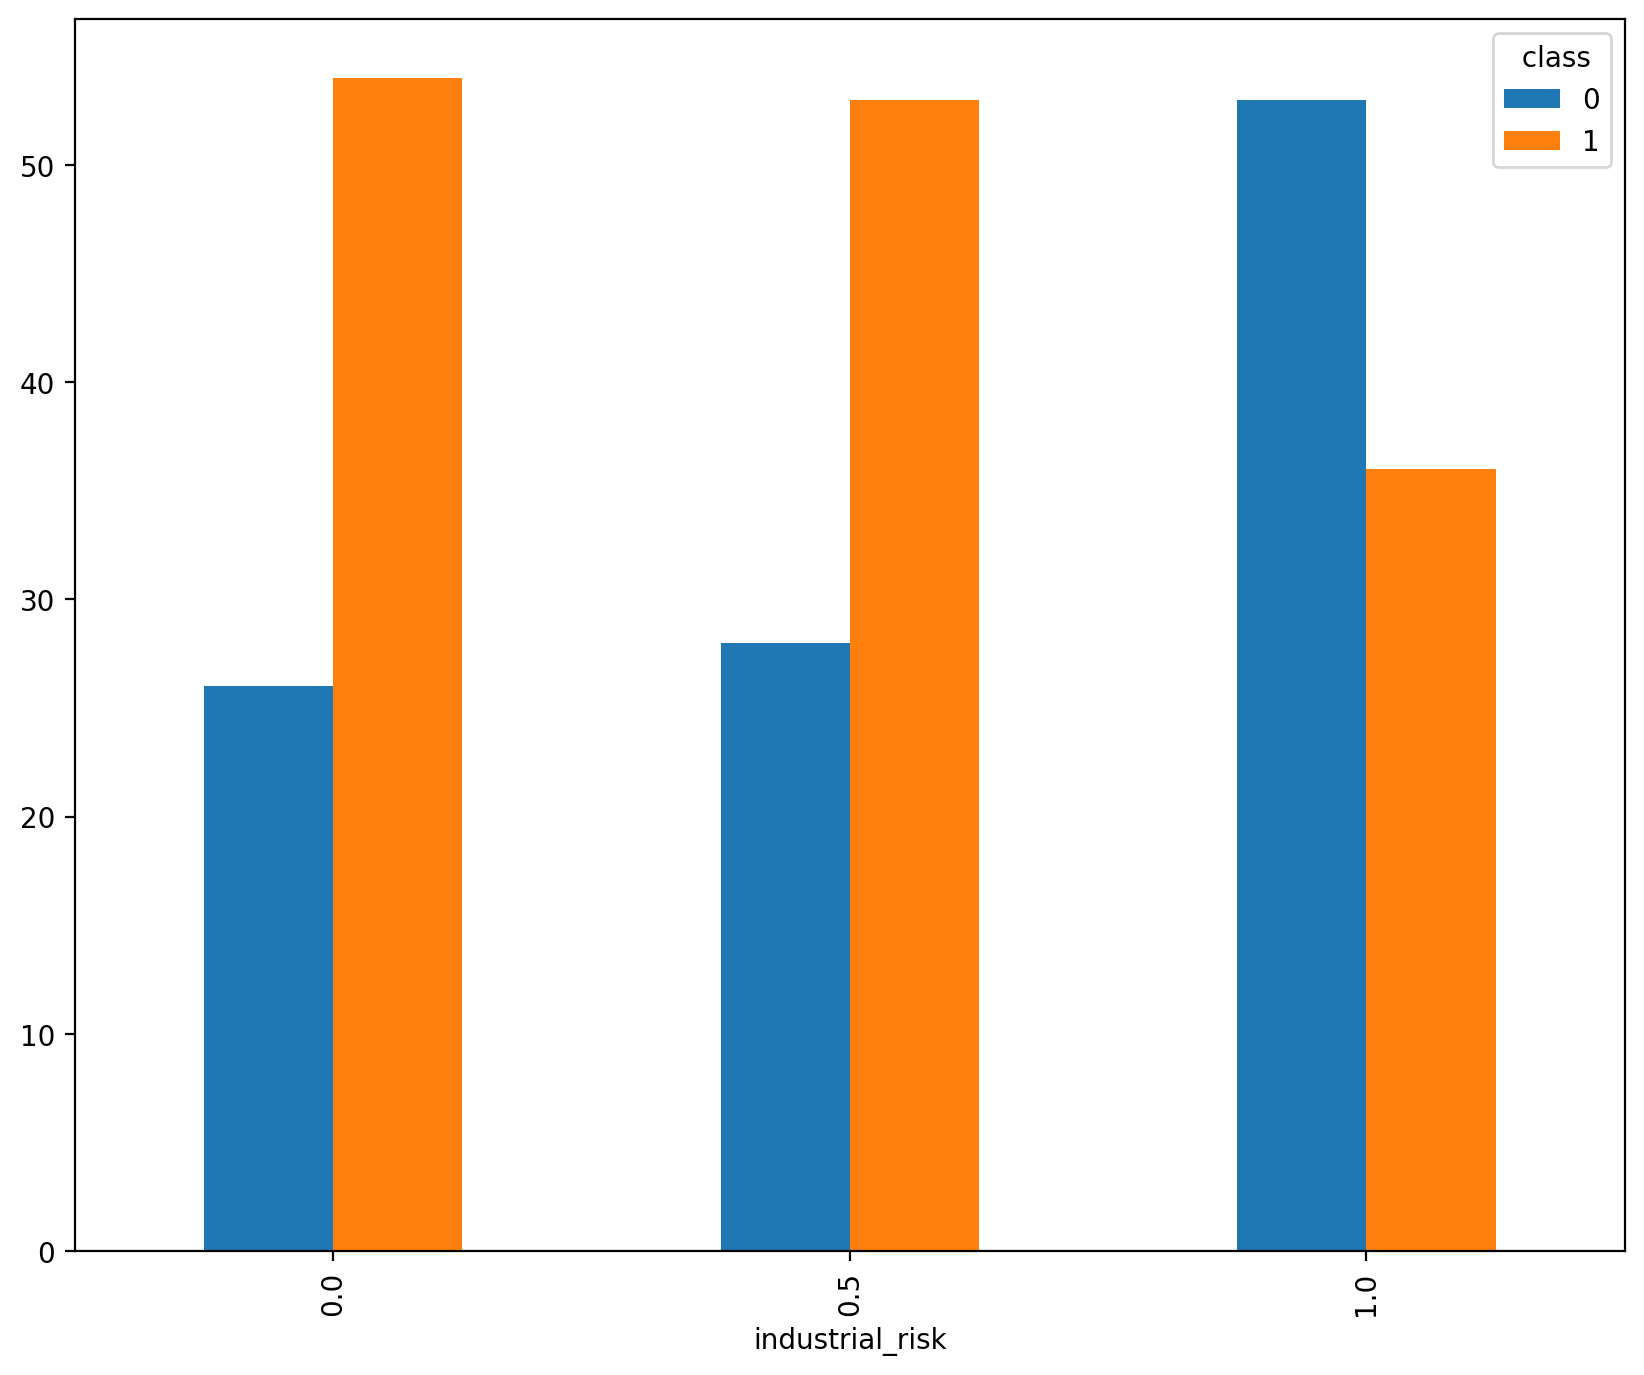

In [22]:
ir=pd.crosstab(df['industrial_risk'],df[' class'])
print(ir)
ir.plot(kind='bar')

 class                    0   1
 financial_flexibility         
0.0                     102  17
0.5                       4  70
1.0                       1  56


<Axes: xlabel=' financial_flexibility'>

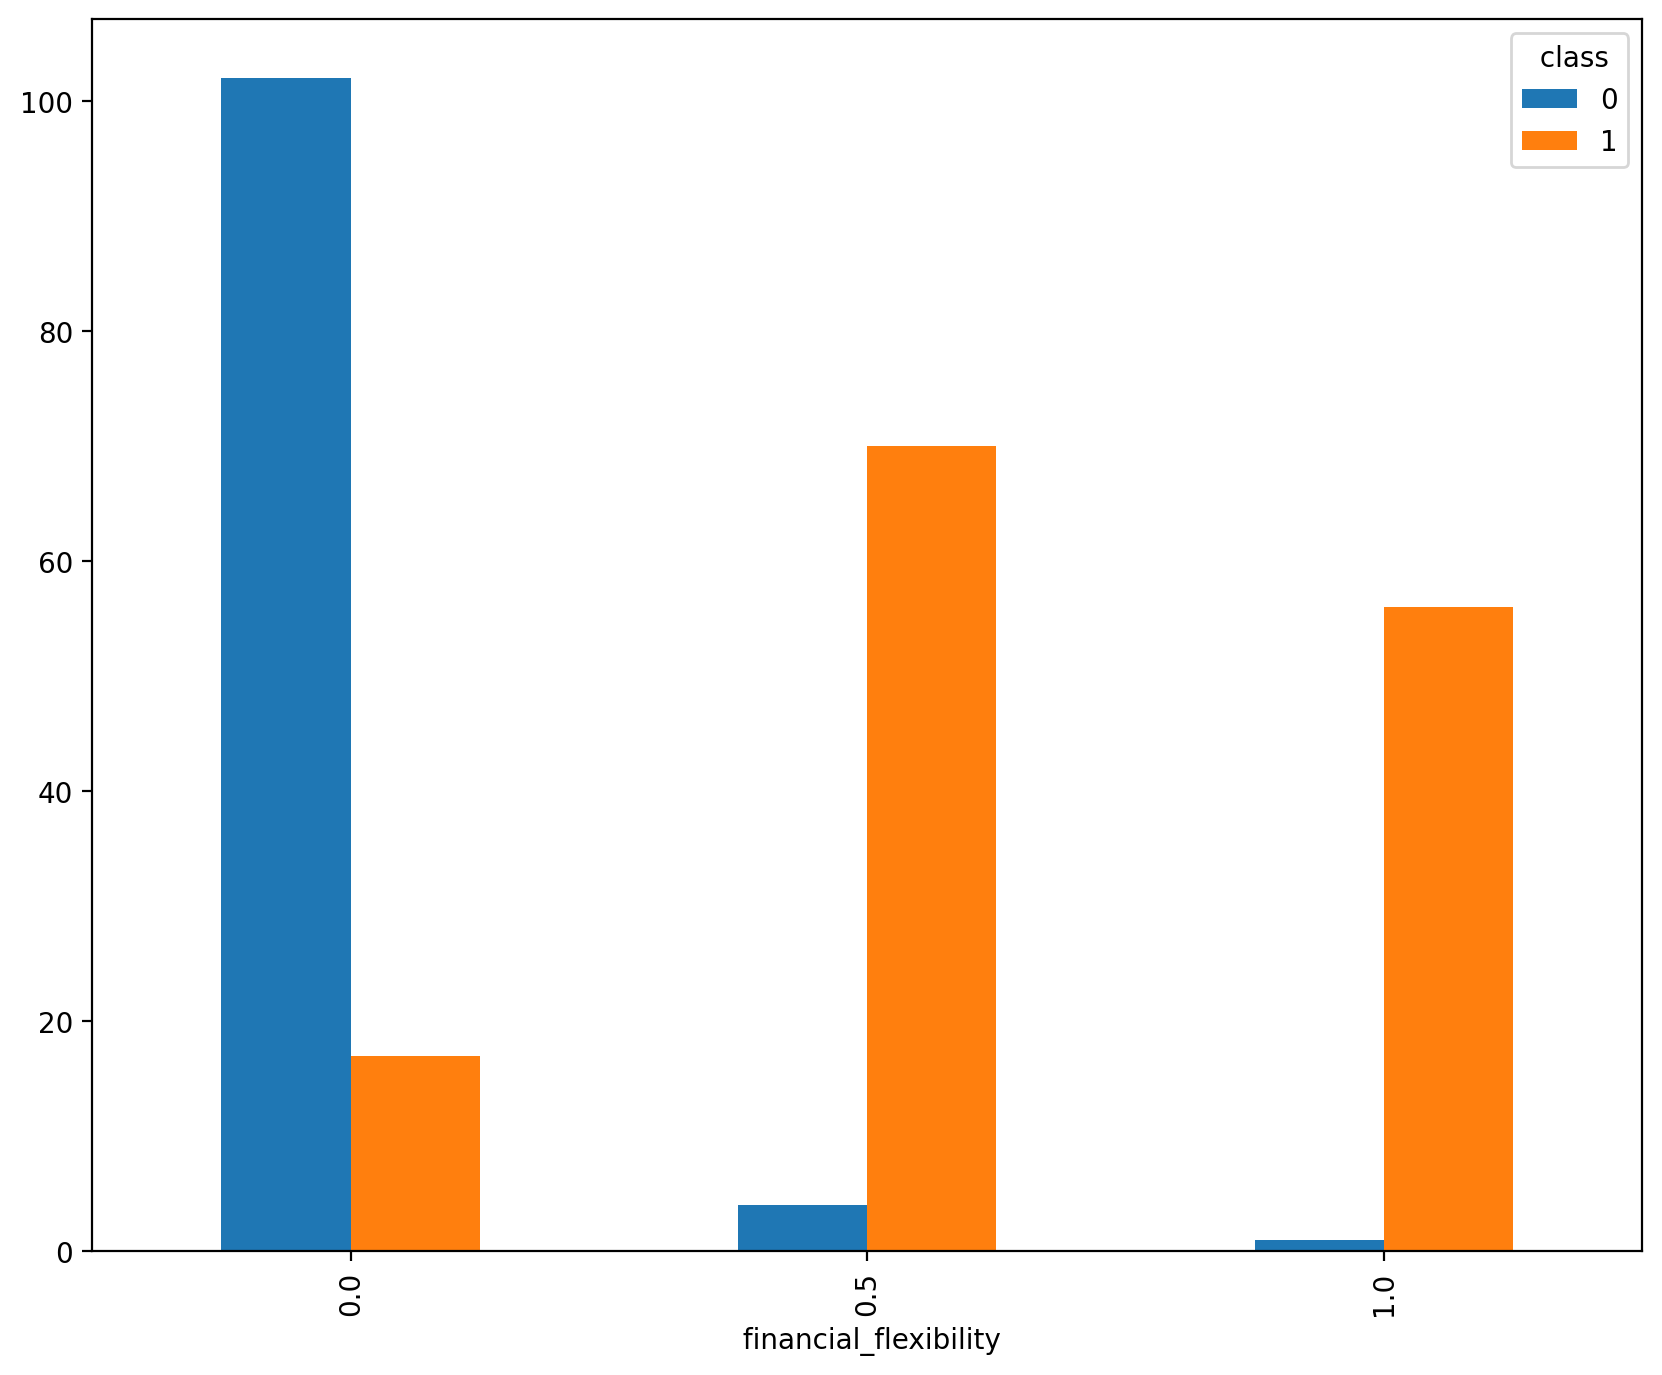

In [23]:
ff=pd.crosstab(df[' financial_flexibility'],df[' class'])
print(ff)
ff.plot(kind='bar')

 class         0   1
 credibility        
0.0           87   7
0.5           17  60
1.0            3  76


<Axes: xlabel=' credibility'>

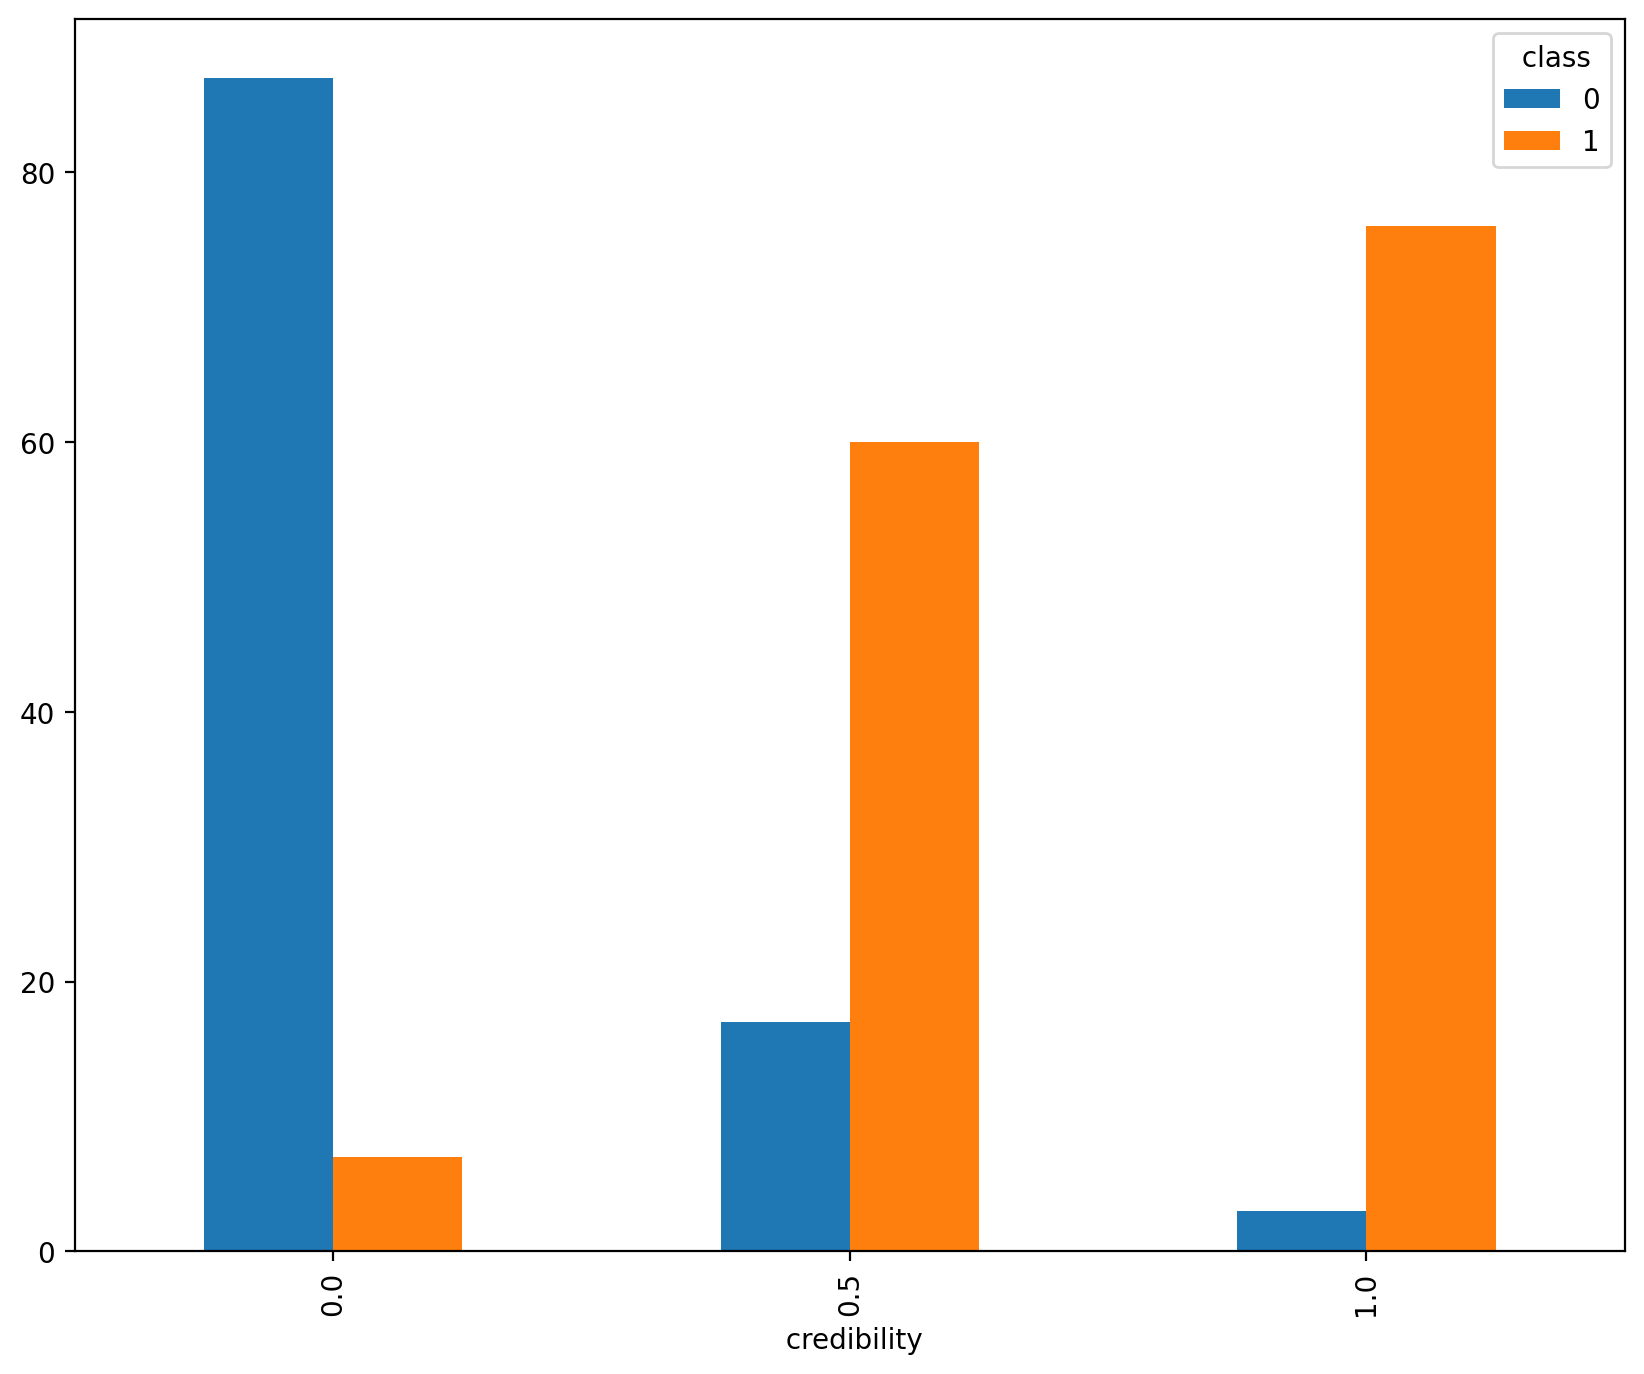

In [24]:
cred=pd.crosstab(df[' credibility'], df[' class'])
print(cred)
cred.plot(kind='bar')

 class            0   1
 operating_risk        
0.0              19  60
0.5              24  33
1.0              64  50


<Axes: xlabel=' operating_risk'>

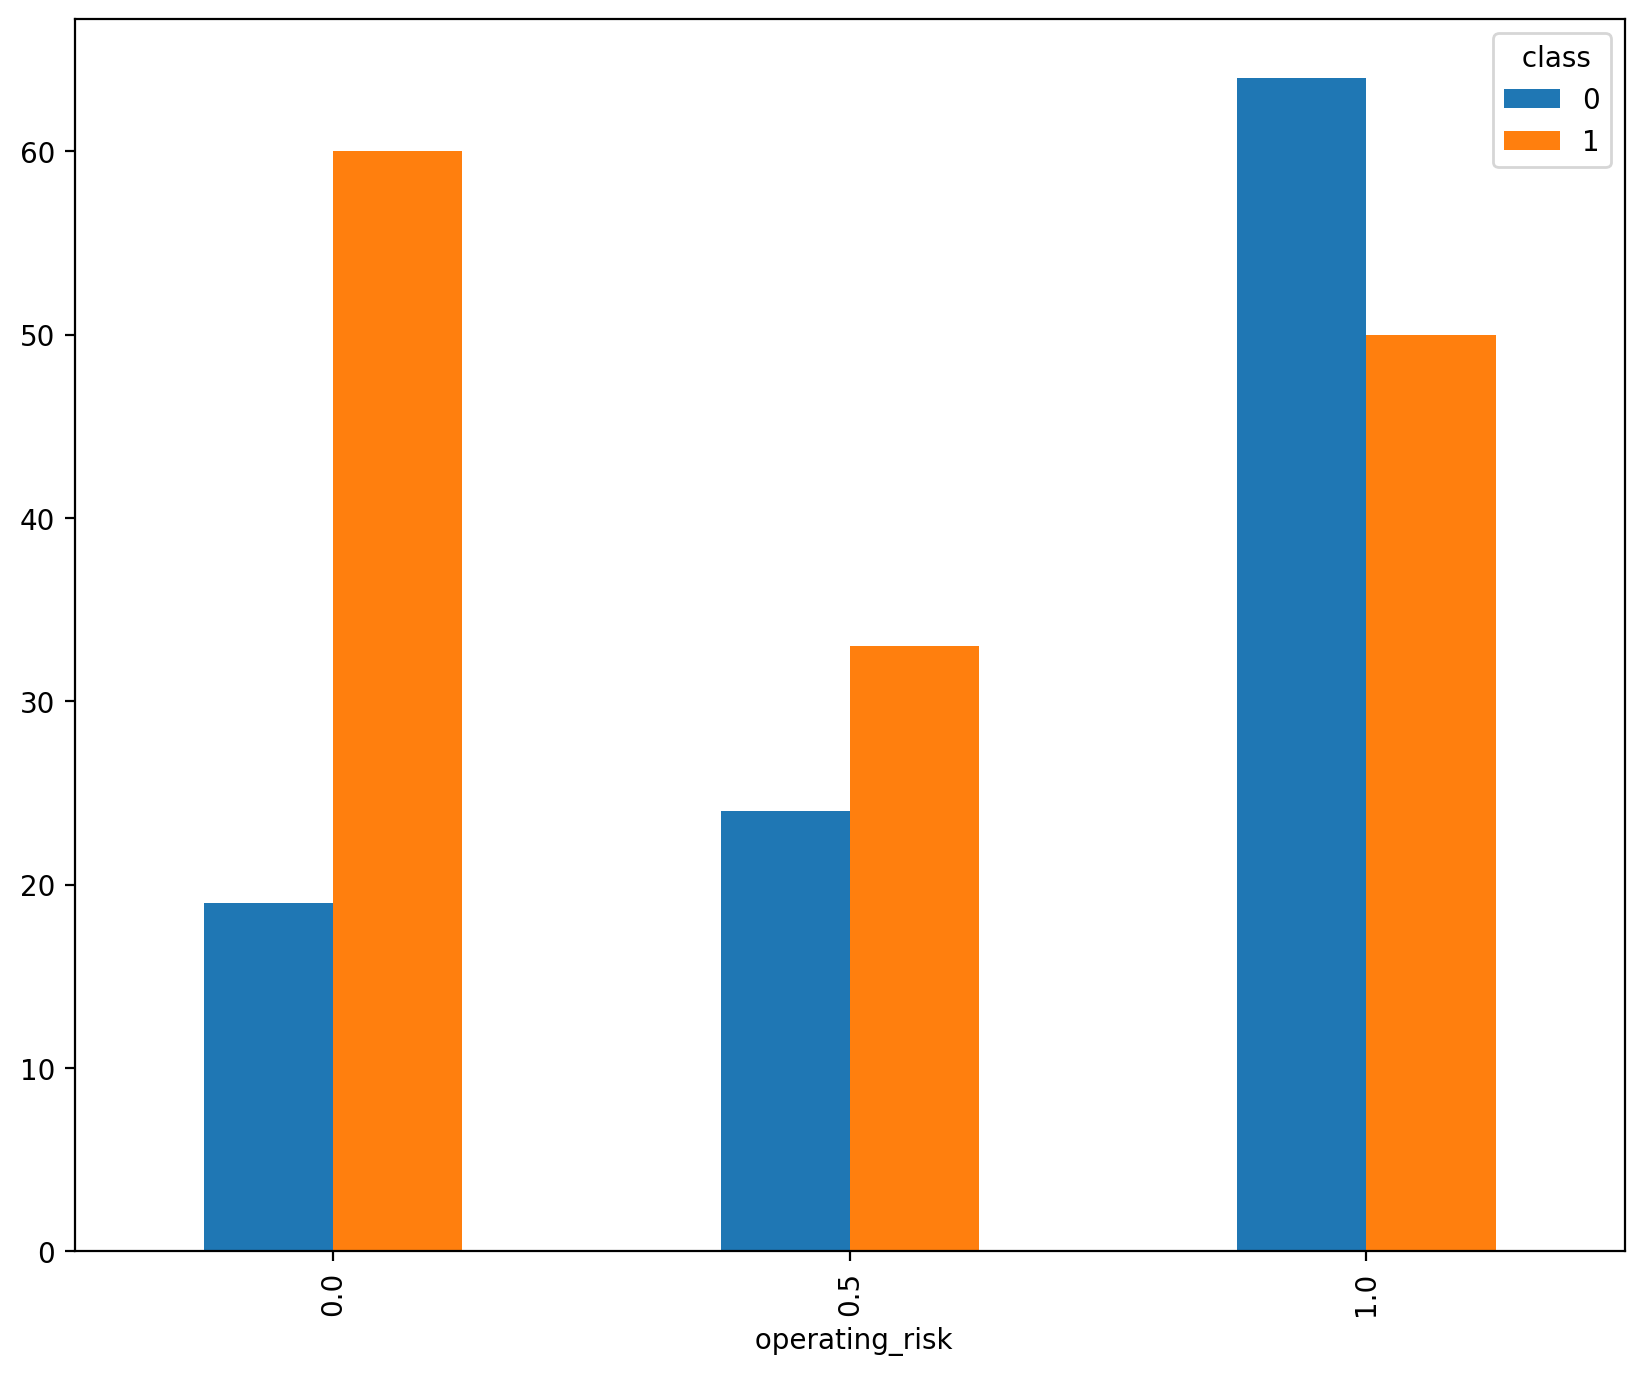

In [25]:
opr=pd.crosstab(df[' operating_risk'], df[' class'])
print(opr)
opr.plot(kind='bar')

 class              0   1
 competitiveness         
0.0               103   0
0.5                 4  52
1.0                 0  91


<Axes: xlabel=' competitiveness'>

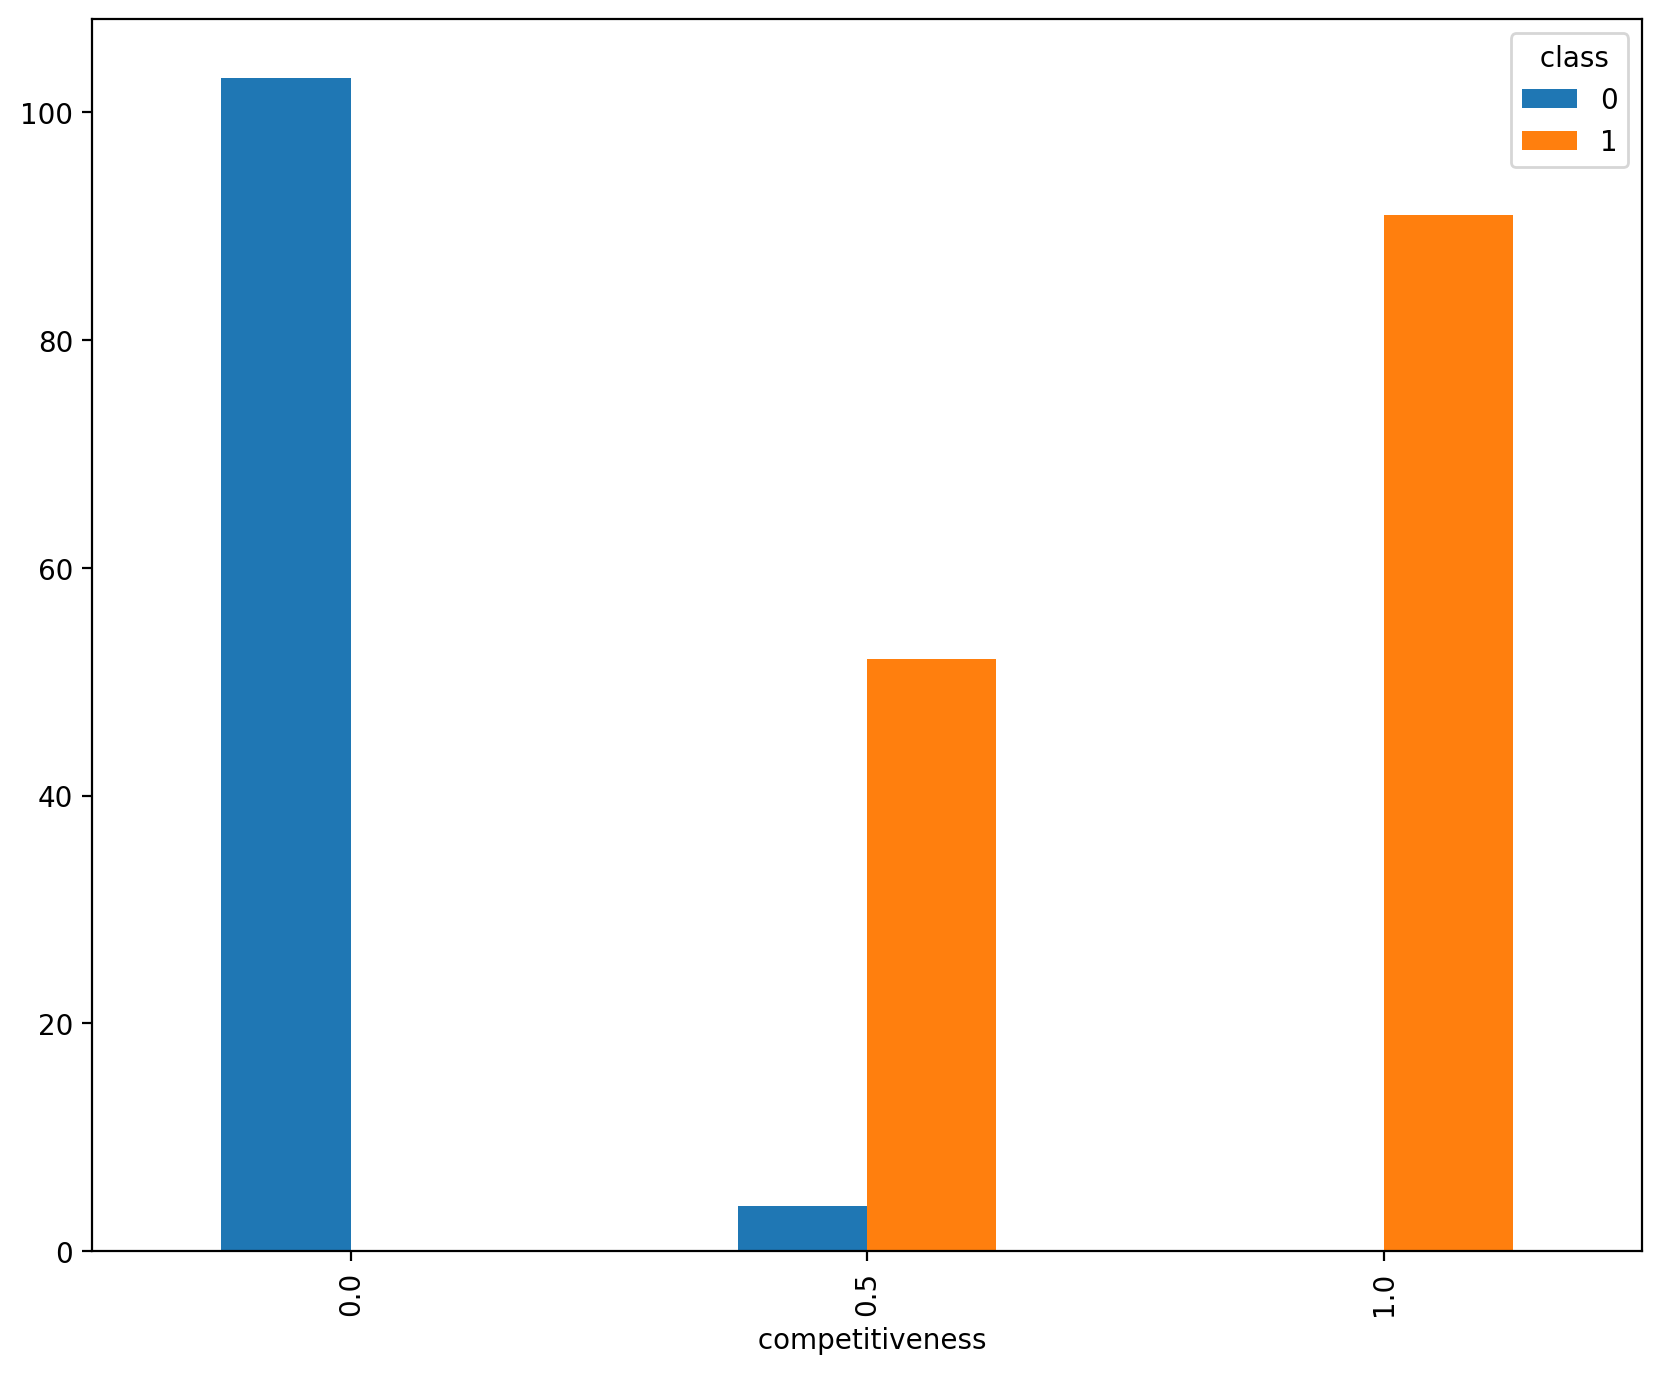

In [26]:
comp=pd.crosstab(df[' competitiveness'], df[' class'])
print(comp)
comp.plot(kind='bar')

 credibility      0.0  0.5  1.0
 competitiveness               
0.0                83   17    3
0.5                 5   25   26
1.0                 6   35   50


<Axes: xlabel=' competitiveness'>

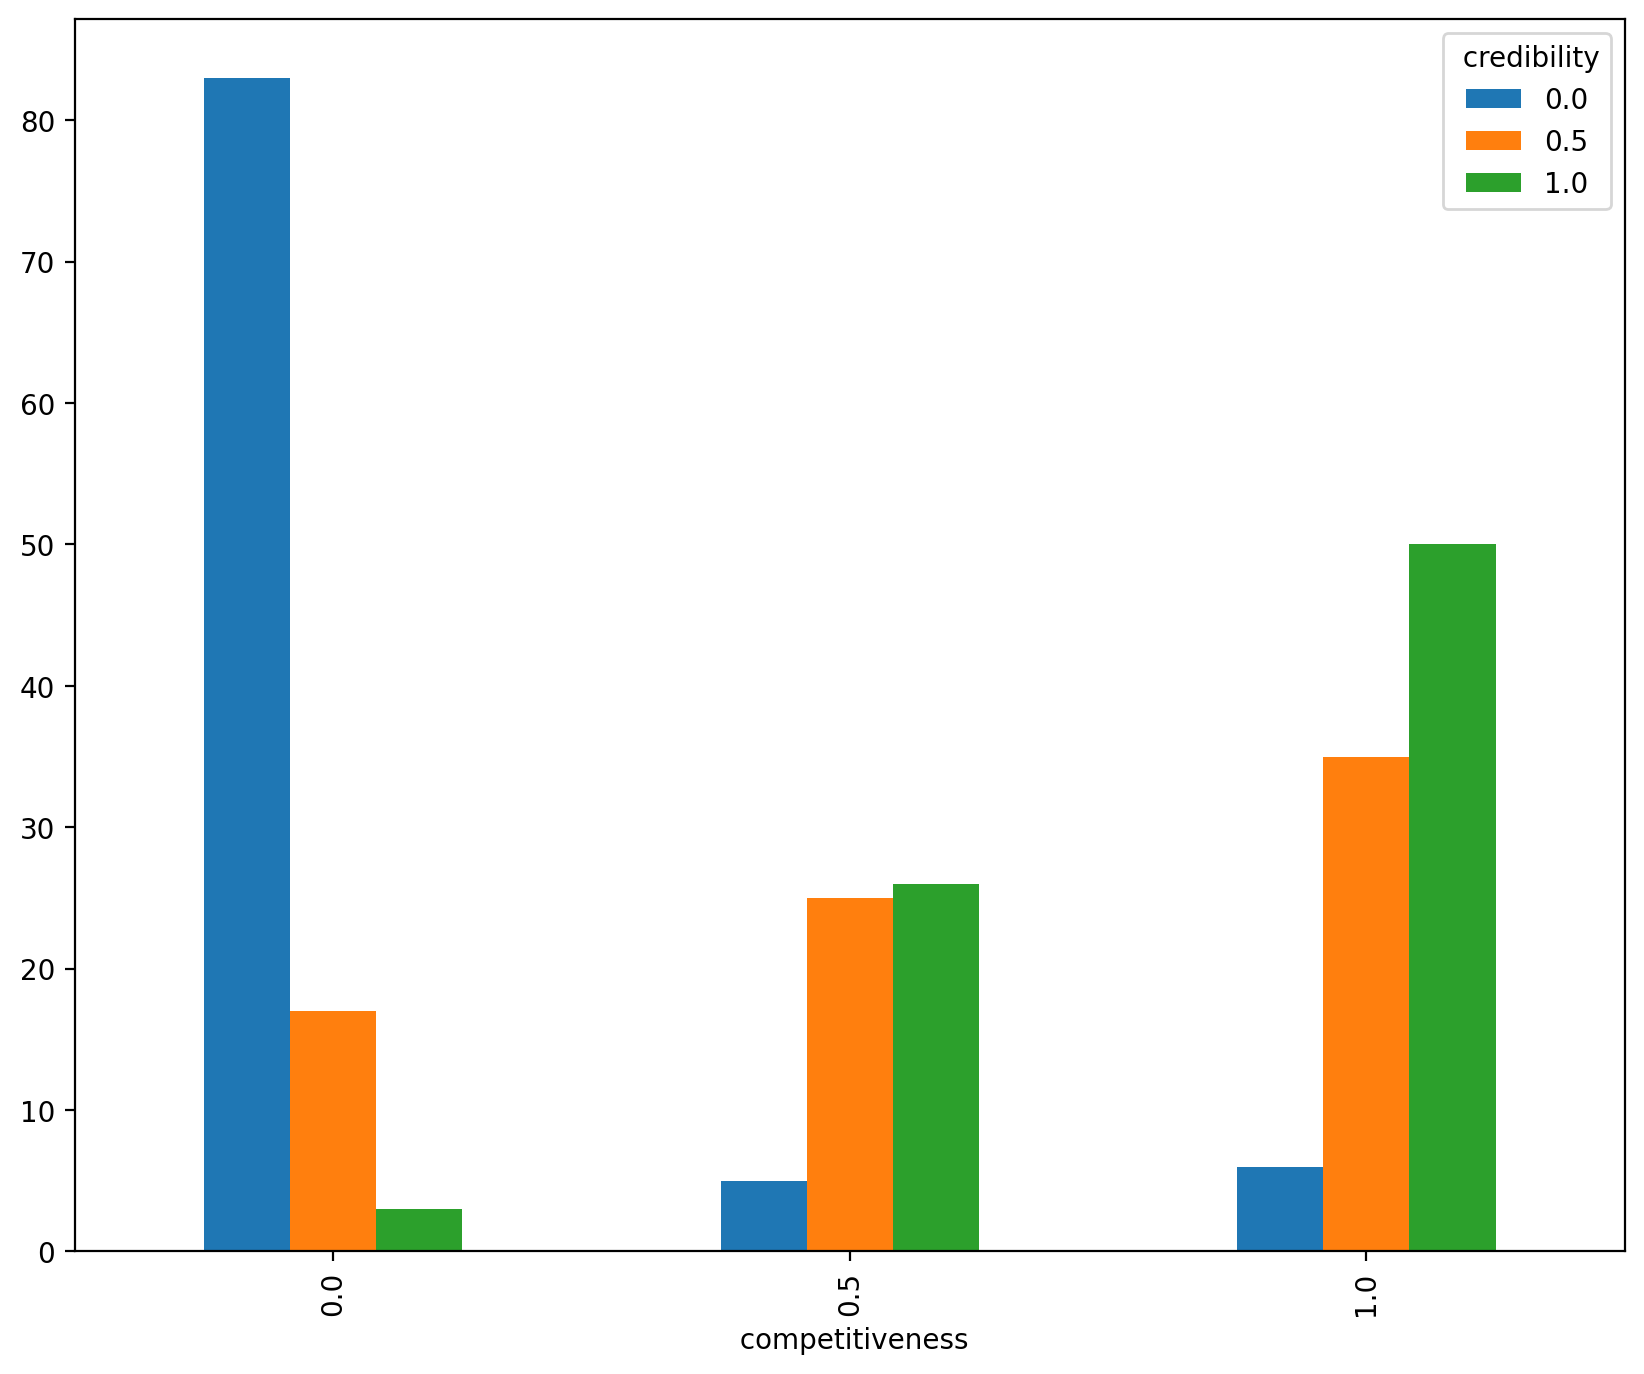

In [27]:
cc=pd.crosstab(df[' competitiveness'], df[' credibility'])
print(cc)
cc.plot(kind='bar')

 competitiveness        0.0  0.5  1.0
 financial_flexibility               
0.0                      98    8   13
0.5                       4   32   38
1.0                       1   16   40


<Axes: xlabel=' financial_flexibility'>

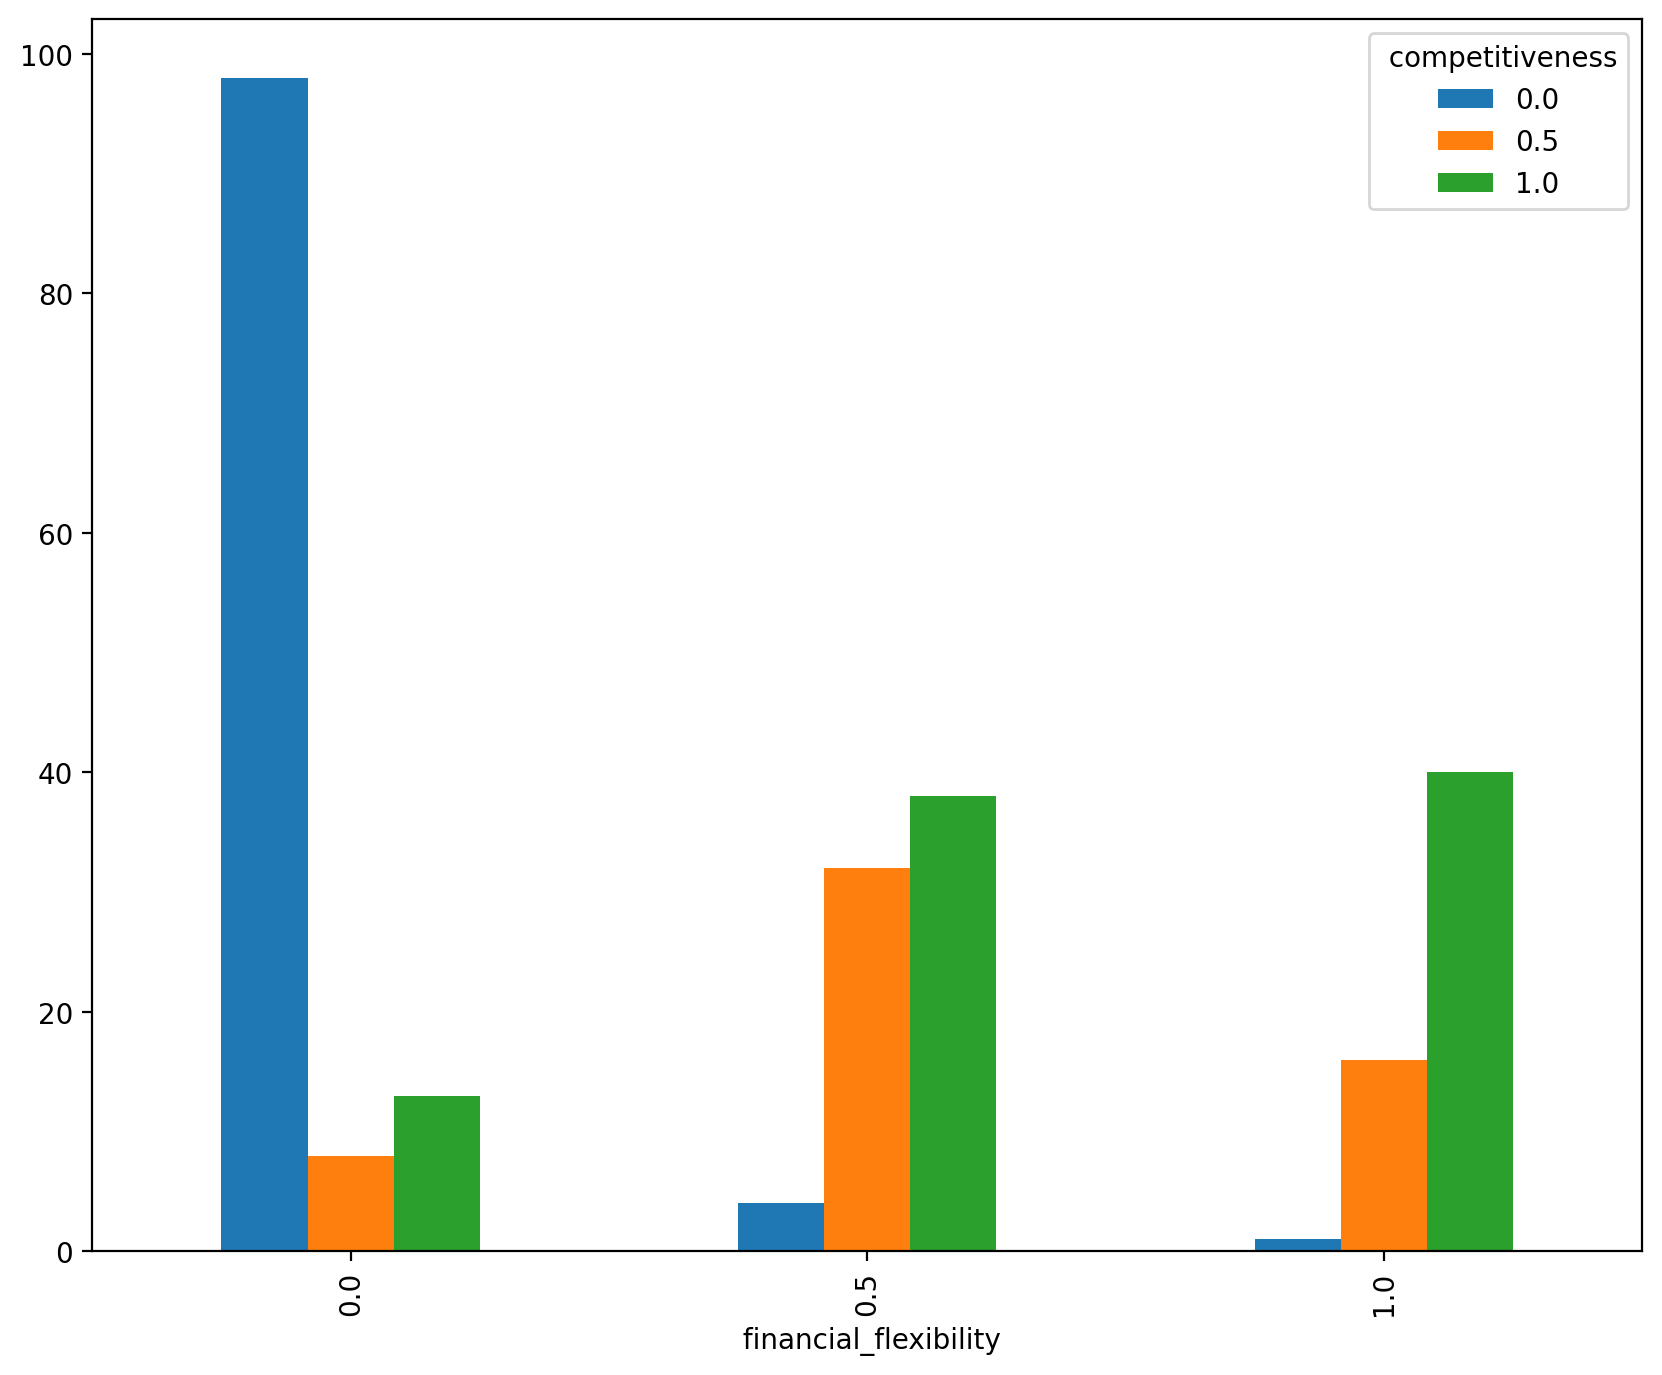

In [28]:
fcomp=pd.crosstab(df[' financial_flexibility'], df[' competitiveness'])
print(fcomp)
fcomp.plot(kind='bar')


## Model Buliding

In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split # trian and test
from sklearn import metrics
from sklearn import preprocessing 


In [30]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

## Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
logisticlassifier = LogisticRegression() 
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [33]:
logisticlassifier.fit(x_train, y_train)

LogisticRegression()

#### We make predictions on the test data after training.

In [34]:
y_pred = logisticlassifier.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1])

In [35]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[18,  0],
       [ 0, 32]], dtype=int64)

### Model Accuracy

#### Test data

In [36]:
y_test_pred = logisticlassifier.predict(x_test)
ac = (y_test,y_test_pred)

#### Train data

In [37]:
y_train_pred = logisticlassifier.predict(x_train)
ac = (y_train,y_train_pred)

In [38]:
from sklearn.metrics import accuracy_score

test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

train_accuracy = accuracy_score(y_train, y_train_pred)
print("Train Accuracy:", train_accuracy)

Test Accuracy: 1.0
Train Accuracy: 0.995


In [39]:
results_logisticlassifier = cross_val_score(logisticlassifier, x, y, cv=kfold, scoring="accuracy")
print(results_logisticlassifier.mean())

0.9960000000000001


In [40]:
print('Classification report for Logestic Regression Model')
f1_logisticlassifier = f1_score(y_test, y_test_pred)
precision_logisticlassifier = precision_score(y_test, y_test_pred)
recall_logisticlassifier = recall_score(y_test, y_test_pred)

print('F1 is: ', f1_logisticlassifier)
print('Precision is: ', precision_logisticlassifier)
print('Recall is: ', recall_logisticlassifier)

Classification report for Logestic Regression Model
F1 is:  1.0
Precision is:  1.0
Recall is:  1.0


#### Since the model is overfitted,Regularization method is used to tackle the issue.

In [41]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50,max_iter=100,tol=0.1)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

### LI = lasso regularization

In [42]:
lasso_reg.score(x_train, y_train)

0.0

In [43]:
lasso_reg.score(x_test, y_test)

-0.03135850694444442

### L2 = Ridge regularization

In [44]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 50, max_iter = 100, tol = 0.1)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [45]:
ridge_reg.score(x_test, y_test)

0.7850284233929683

In [46]:
ridge_reg.score(x_train, y_train)

0.7574164537203277

In [47]:
print('Classification report for Random Forest model')
f1_logisticlassifier = f1_score(y_test, y_test_pred)
precision_logisticlassifier = precision_score(y_test, y_test_pred)
recall_logisticlassifier = recall_score(y_test, y_test_pred)

print('F1 is: ', f1_logisticlassifier)
print('Precision is: ', precision_logisticlassifier)
print('Recall is: ', recall_logisticlassifier)

Classification report for Random Forest model
F1 is:  1.0
Precision is:  1.0
Recall is:  1.0


## KNN MODEL

In [48]:
from sklearn.neighbors import KNeighborsClassifier as KNC
import math
math.sqrt(len(y_test))

7.0710678118654755

In [49]:
KNN_classifier = KNC(n_neighbors =7, p = 2, metric = 'euclidean')
KNN_classifier.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [50]:
y_pred = KNN_classifier.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1])

### Evaluate model

In [51]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[18  0]
 [ 1 31]]


In [52]:
from sklearn.metrics import accuracy_score
KNN_accuracy = accuracy_score(y_test, y_pred)
KNN_accuracy

0.98

In [53]:
results_KNN = cross_val_score(KNN_classifier, x, y, cv=kfold, scoring="accuracy")
print(results_KNN.mean())

0.9879999999999999


In [54]:
print('Classification report for KNN model')
f1_KNN = f1_score(y_test, y_test_pred)
precision_KNN = precision_score(y_test, y_test_pred)
recall_KNN = recall_score(y_test, y_test_pred)

print('F1 is: ', f1_KNN)
print('Precision is: ', precision_KNN)
print('Recall is: ', recall_KNN)

Classification report for KNN model
F1 is:  1.0
Precision is:  1.0
Recall is:  1.0


## Naive Bayes Classifier

In [55]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

#### Creating GaussianNB and MultinomialNB functions

In [56]:
GNB = GaussianNB()
MNB = MultinomialNB()

In [57]:
Naive_GNB = GNB.fit(x_train ,y_train)
y_pred = Naive_GNB.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1])

#### Evaluate Model

In [58]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[18  0]
 [ 0 32]]


In [59]:
from sklearn.metrics import accuracy_score

GNB_acc = accuracy_score(y_test, y_pred)
GNB_acc

1.0

In [60]:
results_GNB = cross_val_score(Naive_GNB, x, y, cv=kfold, scoring="accuracy")
print(results_GNB.mean())

0.976


In [61]:
print('Classification report for GaussianNB model')
f1_GNB = f1_score(y_test, y_test_pred)
precision_GNB = precision_score(y_test, y_test_pred)
recall_GNB = recall_score(y_test, y_test_pred)

print('F1 is: ', f1_GNB)
print('Precision is: ', precision_GNB)
print('Recall is: ', recall_GNB)

Classification report for GaussianNB model
F1 is:  1.0
Precision is:  1.0
Recall is:  1.0


#### Building the model with MultinomialNB

In [62]:
Naive_MNB = MNB.fit(x_train ,y_train)
y_pred = Naive_MNB.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1])

#### Evaluating Model

In [63]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[18  0]
 [ 0 32]]


In [64]:
from sklearn.metrics import accuracy_score

MNB_acc = accuracy_score(y_test , y_pred)
MNB_acc

1.0

In [65]:
results_MNB = cross_val_score(Naive_MNB, x, y, cv=kfold, scoring="accuracy")
print(results_GNB.mean())

0.976


In [66]:
print('Classification report for MultinomialNB model')
f1_MNB = f1_score(y_test, y_test_pred)
precision_MNB = precision_score(y_test, y_test_pred)
recall_MNB = recall_score(y_test, y_test_pred)

print('F1 is: ', f1_MNB)
print('Precision is: ', precision_MNB)
print('Recall is: ', recall_MNB)

Classification report for MultinomialNB model
F1 is:  1.0
Precision is:  1.0
Recall is:  1.0


## Support vector Machine

In [67]:
from sklearn.svm import SVC

#### Linear Model

In [68]:
model_linear = SVC(kernel = 'linear')
model_linear.fit(x_train, y_train)
pred_test_linear = model_linear.predict(x_test)
np.mean(pred_test_linear==y_test)


1.0

In [69]:
results_linear = cross_val_score(model_linear, x, y, cv=kfold, scoring="accuracy")
print(results_linear.mean())

0.984


In [70]:
print('Classification report for linear model')
f1_linear = f1_score(y_test, y_test_pred)
precision_linear = precision_score(y_test, y_test_pred)
recall_linear = recall_score(y_test, y_test_pred)

print('F1 is: ', f1_linear)
print('Precision is: ', precision_linear)
print('Recall is: ', recall_linear)

Classification report for linear model
F1 is:  1.0
Precision is:  1.0
Recall is:  1.0


#### R&F Model 

In [71]:
rbf_model = SVC(kernel='rbf')
rbf_model.fit(x_train,y_train)
rbf_model_pred = rbf_model.predict(x_test)
np.mean(rbf_model_pred== y_test)

1.0

In [72]:
results_SVMrf = cross_val_score(rbf_model, x, y, cv=kfold, scoring="accuracy")
print(results_SVMrf.mean())

0.9960000000000001


In [73]:
print('Classification report for R&F model')
f1_rbf = f1_score(y_test, y_test_pred)
precision_rbf = precision_score(y_test, y_test_pred)
recall_rbf = recall_score(y_test, y_test_pred)

print('F1 is: ', f1_rbf)
print('Precision is: ', precision_rbf)
print('Recall is: ', recall_rbf)

Classification report for R&F model
F1 is:  1.0
Precision is:  1.0
Recall is:  1.0


#### Polynomial Model 

In [74]:
model_poly = SVC(kernel = "poly")
model_poly.fit(x_train,y_train)
pred_test_poly = model_poly.predict(x_test)
np.mean(pred_test_poly==y_test)

0.98

In [75]:
results_SVMpoly = cross_val_score(model_poly, x, y, cv=kfold, scoring="accuracy")
print(results_SVMpoly.mean())

0.992


In [76]:
print('Classification report for Polynomial model')
f1_poly = f1_score(y_test, y_test_pred)
precision_poly = precision_score(y_test, y_test_pred)
recall_poly = recall_score(y_test, y_test_pred)

print('F1 is: ', f1_poly)
print('Precision is: ', precision_poly)
print('Recall is: ', recall_poly)

Classification report for Polynomial model
F1 is:  1.0
Precision is:  1.0
Recall is:  1.0


#### From the above models, SVM polynomial kernal provides good accuracy. 

#### Making a predictive system 

In [77]:
data_point = [[0.0, 1.0, 0.0, 0.0, 1.0, 0.5]]
prediction = model_poly.predict(data_point)

if prediction[0] == 0:
    print('Result: The model suggests a high likelihood of bankruptcy.')
else:
    print('Result: The model suggests a low likelihood of bankruptcy.')

Result: The model suggests a low likelihood of bankruptcy.


## Models Evaluation

In [78]:
# Storing results in a data frame

d1 = {'Models':['Logistic Regression','KNN','GaussianNB','MultinomialNB','SVM_linear','SVM_rbf','SVM_poly'], 
      'Accuracy':[results_logisticlassifier.mean(),results_KNN.mean(),results_GNB.mean(),results_MNB.mean(), results_linear.mean(), results_SVMrf.mean(), 
             results_SVMpoly.mean()],
     'F1_Score':[f1_logisticlassifier, f1_KNN,f1_GNB,f1_MNB, f1_linear, f1_rbf, f1_poly],
     'Precision':[precision_logisticlassifier, precision_KNN,precision_GNB,precision_MNB,precision_linear,precision_rbf,precision_poly],
     'Recall':[recall_logisticlassifier,recall_KNN,recall_GNB,recall_MNB,recall_linear,recall_rbf,recall_poly]}
results_df = pd.DataFrame(d1)
results_df.sort_values(by=['Accuracy'], ascending=False)

,Models,Accuracy,F1_Score,Precision,Recall
0,Logistic Regression,0.996,1.0,1.0,1.0
5,SVM_rbf,0.996,1.0,1.0,1.0
6,SVM_poly,0.992,1.0,1.0,1.0
1,KNN,0.988,1.0,1.0,1.0
4,SVM_linear,0.984,1.0,1.0,1.0
3,MultinomialNB,0.980,1.0,1.0,1.0
2,GaussianNB,0.976,1.0,1.0,1.0


### Selection of best Model
• From the above models, we can see that 'SVM POLYNOMIAL' are giving the best accuracy
  
• Finalizing SVM Model.

# Prediction using SVM

In [79]:
# Building a model on SVM Poly
finalmodel = SVC(kernel = "poly")
finalmodel.fit(x_train,y_train)

SVC(kernel='poly')

In [80]:
pred_y = finalmodel.predict(x_test)
pred_y

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1])

In [81]:
## Taken data from data set 
tf = finalmodel.predict([[1.0, 0.0, 0.0, 0.0,1.0,0.0]])
print(tf)

[1]


In [82]:
y_pred_df= pd.DataFrame({'actual': y_test, 'predicted_prob': finalmodel.predict(x_test)})

In [83]:
y_pred_df.head(15)

,actual,predicted_prob
225,1,1
122,1,1
92,0,0
157,1,1
154,1,1
161,1,1
198,1,1
83,0,0
63,0,0
155,1,1
